In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [51]:
path= r"raw_data/train.csv"
df = pd.read_csv(path)

In [52]:
df.isnull().sum()

ID                                  0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         9
AMT_GOODS_PRICE                   174
NAME_TYPE_SUITE                   882
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    142104
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           215258 non-null  int64  
 1   TARGET                       215258 non-null  int64  
 2   NAME_CONTRACT_TYPE           215258 non-null  object 
 3   CODE_GENDER                  215258 non-null  object 
 4   FLAG_OWN_CAR                 215258 non-null  object 
 5   FLAG_OWN_REALTY              215258 non-null  object 
 6   CNT_CHILDREN                 215258 non-null  int64  
 7   AMT_INCOME_TOTAL             215258 non-null  float64
 8   AMT_CREDIT                   215258 non-null  float64
 9   AMT_ANNUITY                  215249 non-null  float64
 10  AMT_GOODS_PRICE              215084 non-null  float64
 11  NAME_TYPE_SUITE              214376 non-null  object 
 12  NAME_INCOME_TYPE             215258 non-null  object 
 13 

In [54]:
cols_group1 = ['TARGET','ID' ,'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'
]
df_prep = df[cols_group1]

In [55]:
df['NAME_TYPE_SUITE'].isnull().sum()

882

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           215258 non-null  int64  
 1   TARGET                       215258 non-null  int64  
 2   NAME_CONTRACT_TYPE           215258 non-null  object 
 3   CODE_GENDER                  215258 non-null  object 
 4   FLAG_OWN_CAR                 215258 non-null  object 
 5   FLAG_OWN_REALTY              215258 non-null  object 
 6   CNT_CHILDREN                 215258 non-null  int64  
 7   AMT_INCOME_TOTAL             215258 non-null  float64
 8   AMT_CREDIT                   215258 non-null  float64
 9   AMT_ANNUITY                  215249 non-null  float64
 10  AMT_GOODS_PRICE              215084 non-null  float64
 11  NAME_TYPE_SUITE              214376 non-null  object 
 12  NAME_INCOME_TYPE             215258 non-null  object 
 13 

In [57]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      173985
Family              28107
Spouse, partner      7983
Children             2312
Other_B              1190
Other_A               605
Group of people       194
Name: count, dtype: int64

In [58]:
df[cols_group1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      215258 non-null  int64  
 1   ID                          215258 non-null  int64  
 2   NAME_CONTRACT_TYPE          215258 non-null  object 
 3   NAME_TYPE_SUITE             214376 non-null  object 
 4   WEEKDAY_APPR_PROCESS_START  215258 non-null  object 
 5   AMT_INCOME_TOTAL            215258 non-null  float64
 6   AMT_CREDIT                  215258 non-null  float64
 7   AMT_ANNUITY                 215249 non-null  float64
 8   AMT_GOODS_PRICE             215084 non-null  float64
 9   HOUR_APPR_PROCESS_START     215258 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.4+ MB


In [59]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype('category')
df['NAME_TYPE_SUITE'].isnull().sum()

882

In [60]:
df['AMT_GOODS_PRICE'].value_counts()

AMT_GOODS_PRICE
450000.0    18221
225000.0    17710
675000.0    17522
900000.0    10801
270000.0     7986
            ...  
369256.5        1
350068.5        1
259312.5        1
997762.5        1
474867.0        1
Name: count, Length: 841, dtype: int64

In [61]:
df_prep.describe()

,TARGET,ID,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,215258.000000,215258.00000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000
mean,0.080731,107628.50000,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,12.064764
std,0.272422,62139.77646,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,3.264871
min,0.000000,0.00000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000000
25%,0.000000,53814.25000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,107628.50000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,12.000000
75%,0.000000,161442.75000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,14.000000
max,1.000000,215257.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [62]:
df_prep.isnull().sum()

TARGET                          0
ID                              0
NAME_CONTRACT_TYPE              0
NAME_TYPE_SUITE               882
WEEKDAY_APPR_PROCESS_START      0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     9
AMT_GOODS_PRICE               174
HOUR_APPR_PROCESS_START         0
dtype: int64

In [63]:
for col in cols_group1:
    print(f'\n -----Tổng giá trị của biến: {df_prep[col].value_counts(ascending = False)}')
    


 -----Tổng giá trị của biến: TARGET
0    197880
1     17378
Name: count, dtype: int64

 -----Tổng giá trị của biến: ID
196348    1
57538     1
104849    1
26395     1
159713    1
         ..
136545    1
207150    1
41575     1
32747     1
121958    1
Name: count, Length: 215258, dtype: int64

 -----Tổng giá trị của biến: NAME_CONTRACT_TYPE
Cash loans         194860
Revolving loans     20398
Name: count, dtype: int64

 -----Tổng giá trị của biến: NAME_TYPE_SUITE
Unaccompanied      173985
Family              28107
Spouse, partner      7983
Children             2312
Other_B              1190
Other_A               605
Group of people       194
Name: count, dtype: int64

 -----Tổng giá trị của biến: WEEKDAY_APPR_PROCESS_START
TUESDAY      37724
WEDNESDAY    36270
MONDAY       35566
THURSDAY     35443
FRIDAY       35239
SATURDAY     23737
SUNDAY       11279
Name: count, dtype: int64

 -----Tổng giá trị của biến: AMT_INCOME_TOTAL
135000.0    25090
112500.0    21743
157500.0    18592
180000.0

## **1. DISTRIBUTION**

Numerical variance

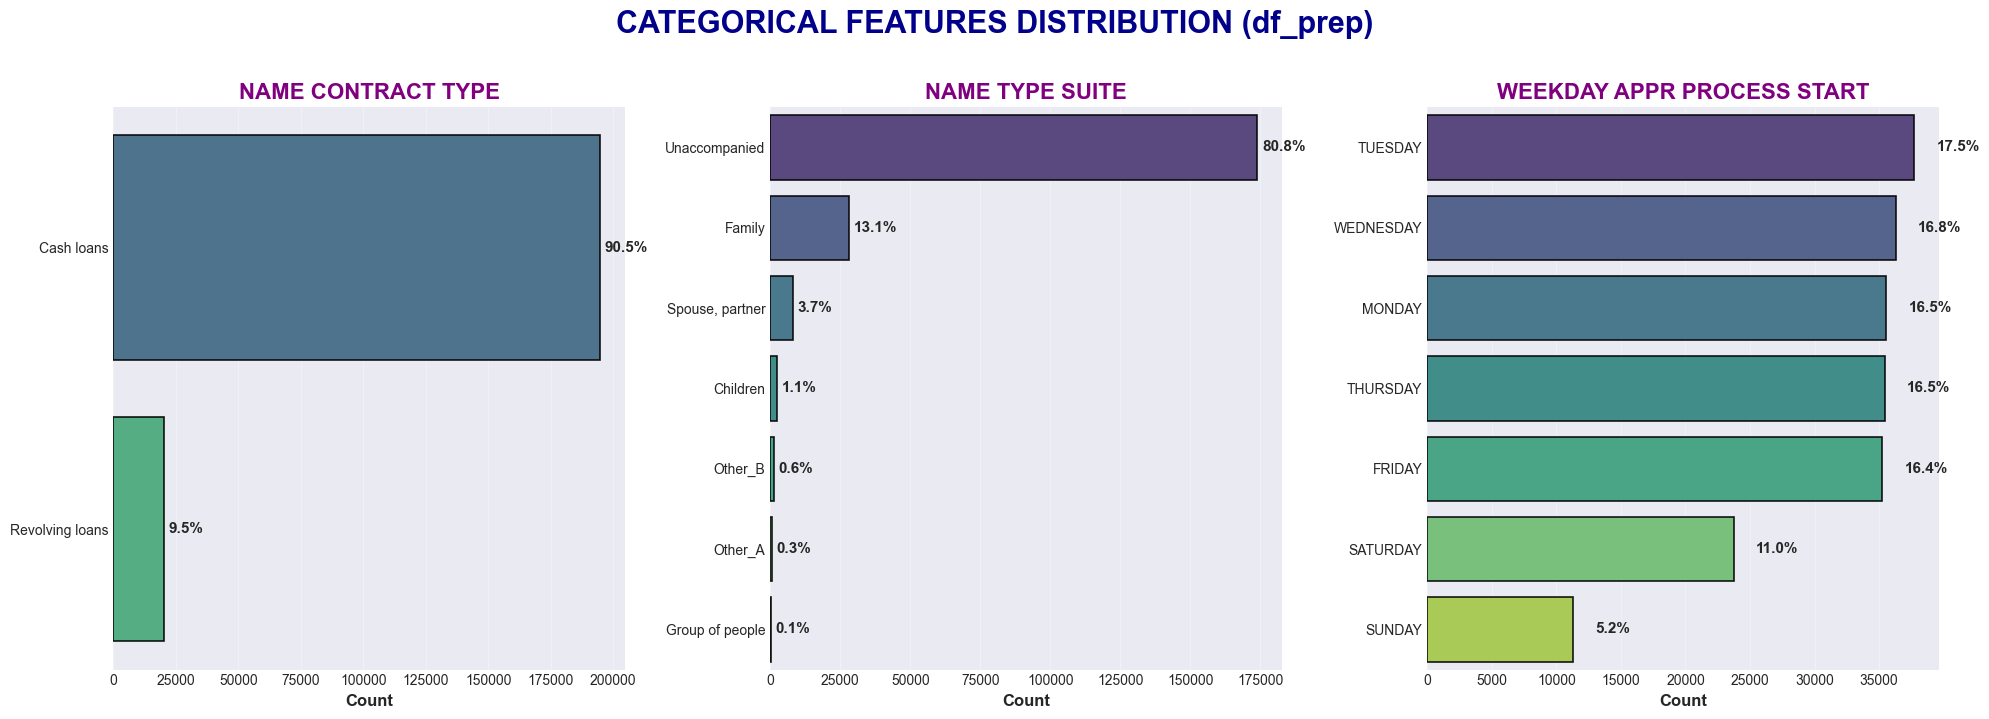

In [64]:
# === CATEGORICAL FEATURES ===
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START'
]

# TARGET vẽ riêng vì nó là biến mục tiêu → cần highlight tỷ lệ vỡ nợ
target_col = 'TARGET'

# === 1. Vẽ các biến categorical bình thường ===
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = df_prep[col].value_counts().index
    sns.countplot(data=df_prep, y=col, ax=ax, order=order,
                  palette='viridis', alpha=0.9, edgecolor='black', linewidth=1.2)
    
    total = len(df_prep)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        x = p.get_width() + total * 0.008
        y = p.get_y() + p.get_height()/2
        ax.text(x, y, percentage, va='center', ha='left', fontsize=11, fontweight='bold')
    
    ax.set_title(f'{col.replace("_", " ")}', fontsize=16, fontweight='bold', color='purple')
    ax.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.grid(True, axis='x', alpha=0.3)

plt.suptitle('CATEGORICAL FEATURES DISTRIBUTION (df_prep)', 
             fontsize=22, fontweight='bold', color='darkblue', y=1.02)
plt.tight_layout()
plt.show()

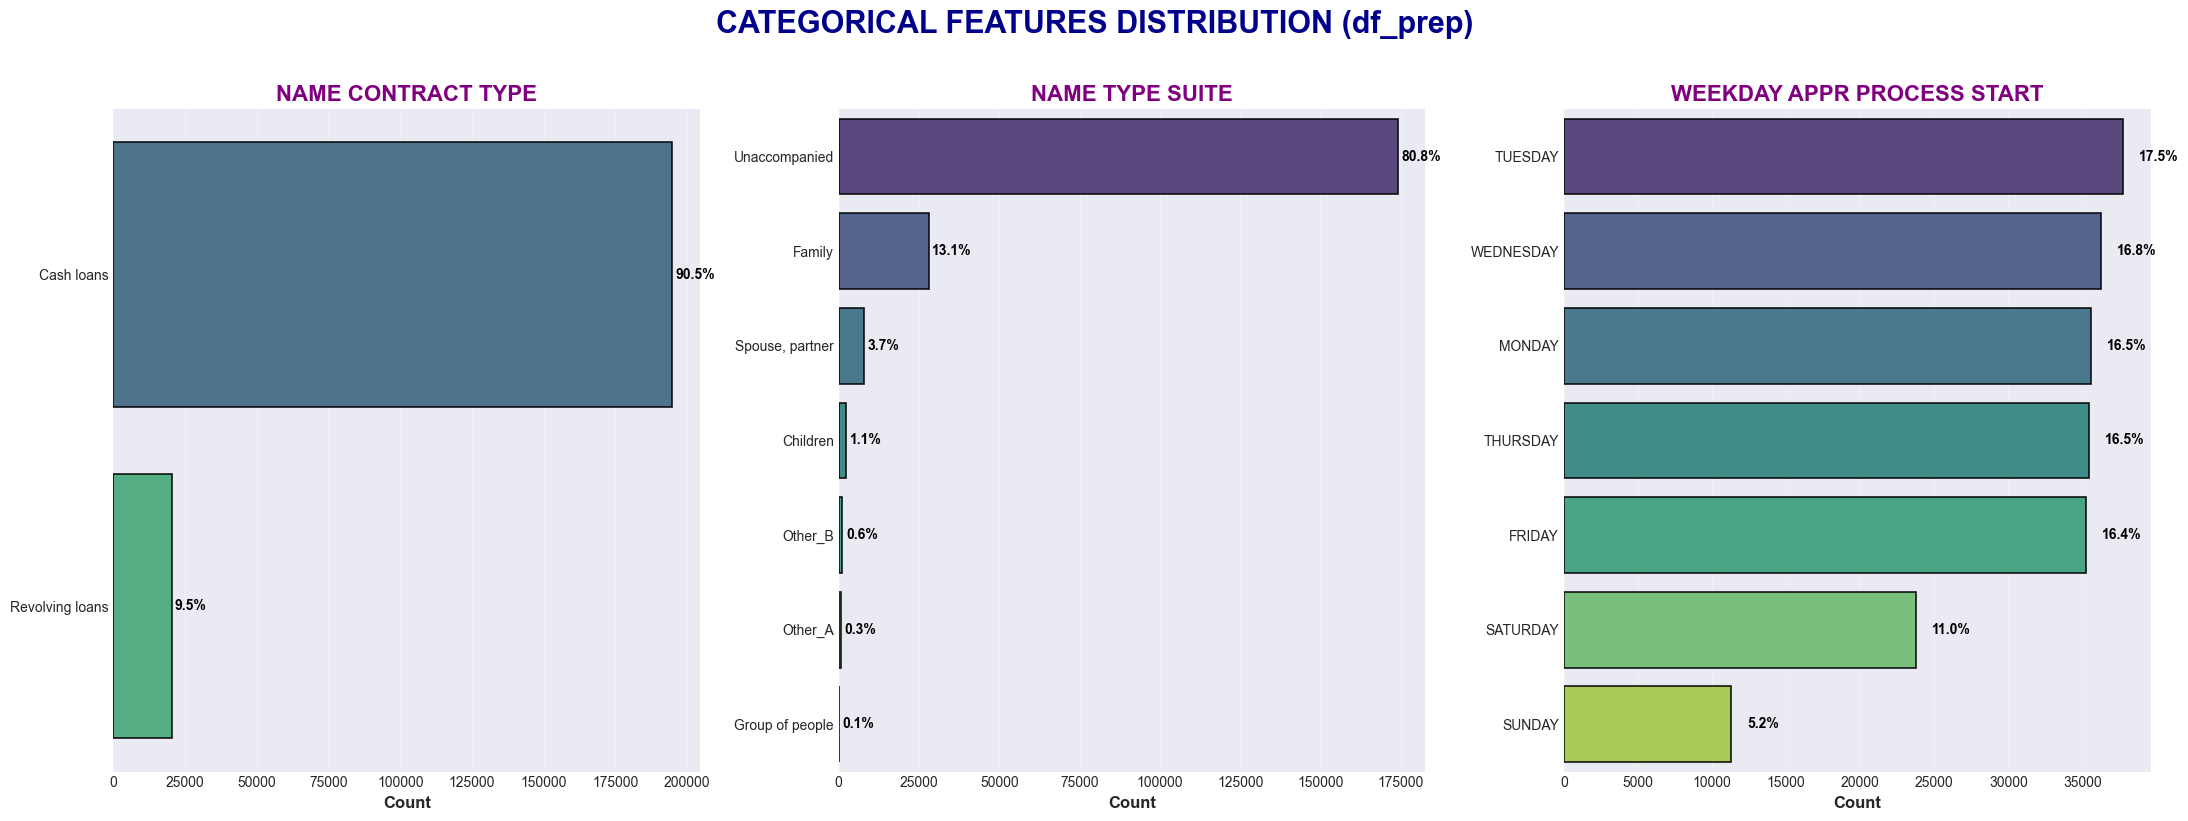

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = df_prep[col].value_counts().index
    sns.countplot(data=df_prep, y=col, ax=ax, order=order,
                  palette='viridis', alpha=0.9, edgecolor='black', linewidth=1.2)

    total = len(df_prep)
    
    # Hiển thị % cho tất cả các thanh, kể cả nhỏ
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{100 * width / total:.1f}%'
        x = width + total * 0.005  # đưa text ra ngoài thanh, chỉnh nhỏ hơn để phù hợp cả thanh nhỏ
        y = p.get_y() + p.get_height()/2
        ax.text(x, y, percentage, va='center', ha='left', fontsize=10, fontweight='bold', color='black')

    ax.set_title(f'{col.replace("_", " ")}', fontsize=16, fontweight='bold', color='purple')
    ax.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.grid(True, axis='x', alpha=0.3)

plt.suptitle('CATEGORICAL FEATURES DISTRIBUTION (df_prep)', 
             fontsize=22, fontweight='bold', color='darkblue', y=1.02)
plt.tight_layout()
plt.show()


`NAME_CONTRACT_TYPE`
1. Giới Thiệu Biến

Biến NAME_CONTRACT_TYPE là một đặc trưng phân loại (categorical feature) mang tính cấu trúc, xác định loại sản phẩm vay mà khách hàng đăng ký. Trong tập dữ liệu này, biến này bao gồm hai danh mục chính:

Cash loans (Khoản vay tiền mặt): Các khoản vay trả góp truyền thống, khách hàng nhận toàn bộ số tiền một lần và trả dần theo kỳ hạn.

Revolving loans (Khoản vay tuần hoàn/Thẻ tín dụng): Các khoản vay cung cấp hạn mức tín dụng mà khách hàng có thể sử dụng và tái sử dụng (quay vòng) khi trả nợ.

2. Phân Bố Giá trị (Value Distribution)

Phân tích tần suất của biến NAME_CONTRACT_TYPE cho thấy một sự mất cân bằng nghiêm trọng (severe class imbalance) trong tập dữ liệu:

Cash loans chiếm ưu thế áp đảo với 90.5% tổng số quan sát.

Revolving loans chỉ chiếm một phần rất nhỏ, ở mức 9.5%.

Điều này chứng tỏ đại đa số khách hàng trong tập dữ liệu ưu tiên lựa chọn hình thức vay trả góp truyền thống (Cash loans) thay vì vay theo hạn mức (Revolving loans).

3. Đánh giá Nghiệp vụ (Domain Insight)

Trong thực tế ngành tài chính tín dụng, phân phối này là hoàn toàn hợp lý và phản ánh đúng thực tế kinh doanh tại nhiều thị trường, đặc biệt là tại các tổ chức tín dụng phi ngân hàng hoặc tập trung vào các khoản vay tiêu dùng nhỏ và vừa.

**Nhu cầu Thị trường:**

Mục đích vay rõ ràng: Cash loans thường được sử dụng để đáp ứng các nhu cầu cụ thể, lớn (như mua sắm đồ gia dụng lớn, chi phí y tế, giáo dục), do đó nhu cầu đối với sản phẩm này luôn cao hơn.

Thẩm định Rủi ro: Các tổ chức cho vay có thể cảm thấy dễ dàng hơn trong việc quản lý và dự đoán rủi ro đối với Cash loans (có lịch trả nợ cố định) hơn là Revolving loans (biến động theo nhu cầu sử dụng của khách hàng).

**Ưu tiên của Tổ chức:**

Dễ quản lý: Cash loans có cấu trúc trả nợ cố định (fixed installments), giúp dễ dàng tính toán dòng tiền và quản lý tài sản nợ.

Phổ biến hơn: Tại nhiều thị trường, đặc biệt là cho vay tiêu dùng, sản phẩm cho vay trả góp theo tháng (Cash loans) là sản phẩm cốt lõi và được đẩy mạnh hơn.

`Mối quan hệ với target`
1. Mối Quan Hệ với Rủi ro (Default Rate)

Phân tích biểu đồ kép (Count vs Default Rate) cho thấy mối quan hệ rủi ro là trực tiếp và đáng kể về mặt kinh doanh:

Cash loans (Vay tiền mặt): Chiếm ưu thế về số lượng hồ sơ (khoảng 195,000 hồ sơ) nhưng có Tỷ lệ Mắc nợ thấp hơn (xấp xỉ 8%).

Revolving loans (Vay tuần hoàn): Chiếm số lượng rất ít (khoảng 20,000 hồ sơ) nhưng có Tỷ lệ Mắc nợ cao hơn đáng kể (xấp xỉ 12.5%).

Kết luận: Mặc dù Cash loans là nhóm đa số, khách hàng vay Revolving loans có nguy cơ không trả được nợ cao hơn khoảng 56% so với nhóm Cash loans (tính theo tỷ lệ $\frac{12.5\%}{8\%} \approx 1.56$), biến nó thành một yếu tố phân biệt rủi ro quan trọng.

`NAME_TYPE_SUITE`

📝 Phân Tích Đặc Trưng (Feature Analysis): NAME_TYPE_SUITE
1. Giới Thiệu Biến
Biến NAME_TYPE_SUITE là một đặc trưng phân loại (categorical feature) mang tính ngữ cảnh, mô tả mối quan hệ của khách hàng với người đi cùng khi nộp đơn vay. Biến này cung cấp cái nhìn về mức độ hỗ trợ xã hội hoặc bối cảnh xung quanh việc vay tiền của người nộp đơn.

Các danh mục chính bao gồm Unaccompanied, Family, Spouse, partner, và nhiều nhóm thiểu số khác.

2. Phân Bố Giá trị (Value Distribution)
Phân tích tần suất của biến NAME_TYPE_SUITE cho thấy một sự mất cân bằng cực kỳ nghiêm trọng (extreme class imbalance):

Unaccompanied chiếm ưu thế áp đảo với 173,985 hồ sơ, tương đương 81.2% tổng số quan sát. Đây là nhóm Mode (Phổ biến nhất).

Family là nhóm lớn thứ hai, chiếm 13.1%.

Các danh mục còn lại (như Spouse, partner, Children, Other_B, Other_A, Group of people) có tần suất rất thấp, tổng cộng chỉ chiếm khoảng 5.7%.

Điều này chứng tỏ đại đa số khách hàng tự mình nộp đơn vay.

3. Đánh giá Nghiệp vụ (Domain Insight)
Trong thực tế ngành cho vay tiêu dùng, phân phối này hoàn toàn hợp lý và phản ánh đúng hành vi của khách hàng trong quy trình nộp đơn vay tiền mặt hoặc tiêu dùng:

A. Phản ánh Tính Độc lập và Quy trình
Tâm lý và Quy trình: Tỷ lệ Unaccompanied chiếm ưu thế (81.2%) cho thấy việc vay tiền thường được coi là quyết định cá nhân và độc lập của người nộp đơn. Nó cũng phản ánh các khoản vay tiêu dùng (như của Home Credit) thường có quy trình nộp đơn đơn giản và không yêu cầu sự hiện diện của người bảo lãnh hay người đi cùng.

Hỗ trợ Gia đình: Sự hiện diện của Family (13.1%) hoặc Spouse, partner (3.7%) thường gợi ý rằng khoản vay đó có thể liên quan đến tài chính gia đình hoặc là một quyết định lớn hơn, cần sự tham khảo ý kiến.

B. Thẩm định Rủi ro
Các tổ chức tín dụng thường không dựa vào biến này để đưa ra quyết định chấp thuận, nhưng nó giúp cung cấp ngữ cảnh xã hội cho hồ sơ vay.

📊 Mối Quan Hệ với Biến Mục Tiêu (TARGET)
1. Mối Quan Hệ với Rủi ro (Default Rate)
Phân tích Amplitude cho thấy mối quan hệ rủi ro tập trung ở các nhóm thiểu số, trong khi các nhóm lớn lại có tính phân biệt thấp:

Nhóm Lớn (Amplitude Thấp): Các nhóm lớn nhất như Unaccompanied và Family có Amplitude Score gần bằng 0 (thấp nhất). Điều này chỉ ra rằng sự hiện diện/vắng mặt của người đi cùng thuộc các nhóm phổ biến này hầu như không tạo ra sự khác biệt lớn về khả năng mắc nợ (rủi ro tương đối đồng đều).

Nhóm Thiểu số (Tín hiệu Rủi ro Cao): Các danh mục có tần suất cực thấp (như Group of people, Other_B) lại có Amplitude Score cao nhất (thanh màu đỏ dài). Điều này cho thấy khách hàng thuộc các danh mục này có tần suất xuất hiện trong nhóm Mắc nợ cao hơn đáng kể so với trong nhóm Không Mắc nợ.

Kết luận Rủi ro: Mặc dù biến này là một yếu tố dự đoán yếu về mặt tổng thể (do Amplitude thấp ở các nhóm lớn), các nhóm thiểu số có Amplitude cao lại là tín hiệu cảnh báo rủi ro (Red Flag).

2. Tác động đến Mô hình (Model Impact) và Tiền xử lý
Do sự mất cân bằng nghiêm trọng và phân bổ rủi ro không đồng đều, biến này cần được tiền xử lý trước khi đưa vào mô hình:

Cần Feature Engineering (Nhóm lại Danh mục): Bắt buộc phải thực hiện Category Binning (nhóm lại) các danh mục có tần suất cực thấp (Group of people, Other_A, Other_B, Children, v.v.). Việc này nhằm:

Ổn định Mô hình Tuyến tính: Giúp tránh tạo ra các cột thưa thớt (sparse features) và các hệ số (coefficients) không ổn định sau khi mã hóa One-Hot.

Cải thiện Mô hình Dạng Cây: Cung cấp các nút phân loại (splitting rules) đáng tin cậy hơn, tập trung khai thác tín hiệu rủi ro từ nhóm Other_High_Risk được nhóm lại.



`🔬 So Sánh và Đánh giá Dữ liệu NAME_TYPE_SUITE Sau Tiền xử lý`
Việc tiền xử lý biến NAME_TYPE_SUITE đã tạo ra sự khác biệt lớn, chuyển đổi biến này từ một đặc trưng khó sử dụng thành một yếu tố ổn định và có giá trị dự đoán cao.

1. Khác biệt Cấu trúc Dữ liệu
Dữ liệu thô ban đầu có tới 7 danh mục trở lên, bao gồm 5 danh mục nhỏ (Spouse, partner, Children, Other_B, Other_A, Group of people). Sau quá trình xử lý, biến này được đơn giản hóa thành 4 danh mục chính (Unaccompanied, Family, RARE_SUITE, và Unknown). Sự khác biệt cấu trúc cốt lõi là việc gộp 5 danh mục nhỏ lại thành một nhóm duy nhất là RARE_SUITE (5.7%). Đồng thời, quá trình này cũng xử lý các Missing Value bằng cách gán cho nhóm Unknown (0.4%).

2. Insight và Tác động đến Mô hình
Việc chuyển đổi này mang lại lợi ích kép về mặt thống kê và nghiệp vụ.

Tăng Độ Ổn định của Rủi ro (Increased Risk Stability): Trong dữ liệu thô, các danh mục cực hiếm như Group of people (0.1% tần suất) có Amplitude Score cực cao—tín hiệu rủi ro mạnh nhưng không đáng tin cậy do số lượng mẫu quá nhỏ. Việc gộp các nhóm này vào RARE_SUITE (5.7%) đã tăng số lượng quan sát, chuyển đổi các tín hiệu rủi ro rời rạc, dễ biến động thành một mức độ rủi ro trung bình ổn định hơn mà mô hình có thể học và tổng quát hóa được.

Xử lý Ngữ cảnh Thiếu: Sự xuất hiện của nhóm Unknown (0.4%) cho phép mô hình đánh giá xem liệu việc thiếu thông tin về người đi cùng có tự nó là một tín hiệu rủi ro hay không, cung cấp một thông tin nghiệp vụ quan trọng về tính hoàn chỉnh của hồ sơ.

Đơn giản hóa và Khả năng Giải thích: Việc giảm số lượng danh mục từ 7+ xuống 4 làm giảm số lượng biến giả cần thiết cho One-Hot Encoding, giúp các mô hình tuyến tính (như Logistic Regression) trở nên gọn gàng, ổn định và dễ giải thích hơn.

Kết luận: Quá trình tiền xử lý này là hoàn toàn chính xác và cần thiết, vì nó đã khắc phục được vấn đề mất cân bằng dữ liệu cực đoan của biến NAME_TYPE_SUITE. Nó đã thành công trong việc chuyển đổi các tín hiệu rủi ro không ổn định thành một nhóm rủi ro tổng hợp (RARE_SUITE) có thể sử dụng được và đáng tin cậy hơn, nâng cao chất lượng đặc trưng cho mô hình dự đoán.

📝` Phân Tích Đặc Trưng (Feature Analysis): WEEKDAY_APPR_PROCESS_START`
1. Giới Thiệu và Phân Bố Giá trị
Biến WEEKDAY_APPR_PROCESS_START là một đặc trưng phân loại mô tả ngày trong tuần mà khách hàng bắt đầu quy trình nộp đơn vay.

Phân tích tần suất cho thấy một sự phân bố tương đối đồng đều trong các ngày làm việc (Thứ Hai đến Thứ Sáu), nhưng có sự sụt giảm rõ rệt vào cuối tuần:

Đồng đều (Thứ Hai - Thứ Sáu): Các ngày làm việc chiếm từ 16.4% đến 17.5% tổng số hồ sơ.

Sụt giảm (Cuối tuần): Tần suất giảm đáng kể vào Thứ Bảy (11.0%) và thấp nhất là Chủ Nhật (5.2%).

Phân bố này là hợp lý về mặt nghiệp vụ, phản ánh việc khách hàng có xu hướng nộp đơn trong giờ làm việc hoặc ngày làm việc của các tổ chức tài chính.

2. Mối Quan Hệ với Rủi ro (TARGET)
Phân tích mối quan hệ giữa ngày nộp đơn và tỷ lệ mắc nợ (TARGET) cho thấy biến này là một yếu tố dự đoán yếu (weak predictor), nhưng vẫn có tín hiệu rủi ro:

Tỷ lệ Mắc nợ Đồng đều: Tỷ lệ Default Rate giữa các ngày làm việc (Thứ Hai đến Thứ Sáu) là rất đồng đều, dao động quanh mức 7.8% - 8.2%.

Tín hiệu Rủi ro tại Cuối tuần: Mặc dù số lượng hồ sơ nộp vào Thứ Bảy và Chủ Nhật thấp hơn, tỷ lệ mắc nợ của các ngày này không cho thấy sự khác biệt đáng kể hoặc rõ ràng so với các ngày trong tuần.

Kết luận Rủi ro: Ngày nộp đơn không phải là yếu tố phân biệt rủi ro chính trong mô hình.

3. Tác động đến Mô hình (Model Impact) và Tiền xử lý
Do tỷ lệ rủi ro đồng đều, tác động của biến này lên mô hình là nhỏ, nhưng vẫn cần thiết cho tính đầy đủ của dữ liệu.

Tác động Mô hình:

Mô hình Dạng Cây/Tuyến tính: Sau khi OHE (One-Hot Encoding), biến này sẽ thêm 7 cột (hoặc 6 cột) vào mô hình. Do rủi ro gần như nhau, các hệ số (coefficients) của mô hình tuyến tính sẽ gần bằng nhau, hoặc mô hình dạng cây sẽ không sử dụng biến này ở các nút phân loại cấp cao.

Khuyến nghị Tiền xử lý:

Giữ lại và Mã hóa: Biến này nên được giữ lại và OHE để không làm mất bất kỳ thông tin nào, dù là yếu.

Không cần Gộp nhóm: Không cần thiết phải gộp các ngày trong tuần, nhưng có thể cân nhắc gộp SATURDAY và SUNDAY thành nhóm WEEKEND để tạo ra một phân khúc rủi ro duy nhất nếu cần đơn giản hóa mô hình.

`🕒 Phân Tích Đặc Trưng (Feature Analysis): HOUR_APPR_PROCESS_START`
1. Giới Thiệu Biến
HOUR_APPR_PROCESS_START là một biến số (numerical feature) đại diện cho giờ trong ngày (từ 0 đến 23) mà hồ sơ vay của khách hàng được bắt đầu xử lý. Biến này cung cấp insight về hành vi nộp đơn của khách hàng và rủi ro hoạt động/gian lận theo thời gian.

2. Phân Bố Giá trị (Value Distribution)
Phân tích biểu đồ Histogram về tần suất cho thấy sự phân bố hồ sơ nộp đơn tập trung cao điểm vào các giờ hành chính:

Giờ Cao điểm (Peak Hours): Số lượng hồ sơ cao nhất nằm trong khoảng 9:00 - 16:00, với đỉnh điểm là 11:00 (26,055 hồ sơ). Điều này phản ánh rõ ràng rằng khách hàng thường nộp đơn trong giờ làm việc ban ngày của tổ chức tín dụng.

Giờ Thấp điểm (Off-Peak Hours): Tần suất giảm dần sau 17:00 và rất thấp vào sáng sớm (từ 0:00 đến 6:00), với số lượng hồ sơ chỉ khoảng vài chục đến vài trăm.

3. Mối Quan Hệ với Rủi ro (TARGET)
Phân tích biểu đồ Bar Chart so sánh Tần suất (Count) và Tỷ lệ Mắc nợ (Default Rate) theo giờ:

Rủi ro Cao nhất vào Đêm/Sáng sớm: Tỷ lệ Mắc nợ (%) cao nhất tập trung vào các giờ bất thường và ngoài giờ hành chính (ví dụ: 0:00 - 6:00).

Đặc biệt, giờ 0:00 có tỷ lệ Default Rate rất cao (khoảng 20%), dù số lượng hồ sơ cực kỳ thấp (31 hồ sơ).

Các giờ 3:00, 4:00, 5:00, 6:00 cũng có tỷ lệ Default Rate cao hơn mức trung bình.

Rủi ro Ổn định vào Giờ hành chính: Trong khung giờ cao điểm (9:00 - 17:00), Tỷ lệ Mắc nợ là khá ổn định, dao động ở mức thấp hơn (khoảng 7% - 8%).

Ngưỡng rủi ro tăng đột biến: Sau 18:00, rủi ro bắt đầu có xu hướng tăng nhẹ trở lại.

Kết luận Rủi ro: Khác biệt so với biến WEEKDAY_APPR_PROCESS_START, biến HOUR_APPR_PROCESS_START là một yếu tố phân biệt rủi ro quan trọng, đặc biệt là ở các hồ sơ nộp vào đêm/sáng sớm.

4. Tác động Mô hình và KPI
A. Tác động Mô hình và Tiền xử lý
Tín hiệu Gian lận/Bất thường: Tỷ lệ rủi ro cực cao trong khung giờ 0:00-6:00 (dù số lượng nhỏ) là tín hiệu mà mô hình cần khai thác.

Khuyến nghị Tiền xử lý (Feature Engineering): Biến này không nên dùng trực tiếp mà cần được nhóm lại thành các khoảng thời gian có ý nghĩa rủi ro và sau đó OHE.

B. KPI Hướng tới
Phát hiện Hành vi Bất thường/Gian lận: Đây là KPI chính. Công ty muốn sử dụng biến này để xác định ngưỡng rủi ro theo giờ và đặt cảnh báo hoặc yêu cầu thẩm định thủ công (manual underwriting) đối với các hồ sơ nộp vào Giờ bất thường/Đêm. Mục tiêu là giảm thiểu tổn thất phát sinh từ các hồ sơ nộp vào các khung giờ có rủi ro cao nhất.

Tối ưu hóa Vận hành: Xác định giờ cao điểm (9:00 - 16:00) giúp đội ngũ Operations (Vận hành) đảm bảo đủ nhân sự và hệ thống để duy trì KPI về tốc độ xử lý hồ sơ (Processing Speed).


Bạn đã binning (gộp nhóm) biến HOUR_APPR_PROCESS_START từ giá trị liên tục (0-23h) thành 4 nhóm phân loại (Afternoon, Morning, Evening, Late_Night). Đây là một bước Feature Engineering rất quan trọng.

Dưới đây là phân tích sự khác biệt về Insight giữa dữ liệu thô và dữ liệu đã được binning, cùng với lý do tại sao việc này là cần thiết:

🔬 So Sánh Insight: Raw Data vs. Binned Data (HOUR_APPR_PROCESS_START)
1. Phân Tích Dữ liệu Thô (Raw Data)
Insight Chính: Dữ liệu thô (biểu đồ Count vs Default Rate) cho thấy rủi ro rất cao (Default Rate lên tới 20% tại 0:00) tập trung vào các khung giờ bất thường và ngoài giờ hành chính (0:00 - 6:00). * Vấn đề: Rủi ro cực đoan này đến từ số lượng mẫu cực kỳ nhỏ (chỉ 31 hồ sơ tại 0:00). Dù là tín hiệu mạnh, rủi ro này không ổn định về mặt thống kê và dễ khiến mô hình Overfitting vào các trường hợp hiếm gặp.

2. Phân Tích Dữ liệu Sau khi Binning (4 Nhóm)
Phân bố: Nhóm Afternoon (12:00-17:59) và Morning (6:00-11:59) chiếm đa số hồ sơ (gần 93%). Nhóm Late_Night (0:00-5:59) chỉ còn 2.4%. * Insight Rủi ro Khác biệt: Biểu đồ sau binning (Ordered Analysis vs TARGET) cho thấy rõ: * Tín hiệu Rủi ro Ổn định: Nhóm Late_Night có tỷ lệ Default Rate cao nhất (gần 9.5% - cao hơn mức trung bình) so với các nhóm khác.

Phân biệt Rủi ro Rõ ràng: Rủi ro theo xu hướng Late_Night > Evening > Morning ≈ Afternoon.



1. Ổn định Thống kê và Khả năng Tổng quát hóa (Generalization)
Mục tiêu: Chuyển đổi rủi ro không ổn định của 31 hồ sơ tại 0:00 thành rủi ro ổn định của 5,167 hồ sơ trong nhóm Late_Night (2.4%).

Kết quả: Mô hình có thể học được một hệ số rủi ro đáng tin cậy hơn cho các hồ sơ nộp vào đêm/sáng sớm, từ đó cải thiện khả năng dự đoán trên dữ liệu mới (giảm Overfitting).

2. Cải thiện Khả năng Giải thích Nghiệp vụ (Interpretability)
Tạo KPI Mới: 4 nhóm này trở thành một phân khúc rủi ro dễ giải thích cho đội ngũ Credit Risk. Thay vì nói "Rủi ro cao nhất lúc 3:00", ta nói "Tất cả hồ sơ nộp vào Giờ Bất thường (Late_Night) đều có tỷ lệ mắc nợ cao nhất (9.5%)".

Hành động Dễ dàng hơn: Giúp đội ngũ Thẩm định (Underwriting) đặt ra Quy tắc Tự động (Automated Rules) dễ dàng hơn: Nếu hồ sơ rơi vào nhóm Late_Night, hãy tăng thêm X điểm rủi ro hoặc yêu cầu thẩm định thủ công.

3. Tối ưu hóa Mô hình
Việc giảm biến số từ 24 giá trị liên tục xuống còn 4 danh mục phân loại giúp mô hình hoạt động hiệu quả hơn, đặc biệt khi sử dụng One-Hot Encoding (chỉ thêm 4 cột thay vì 24).

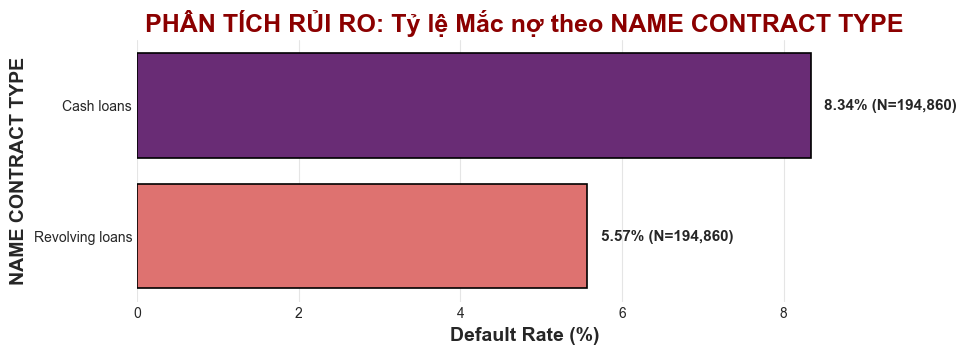

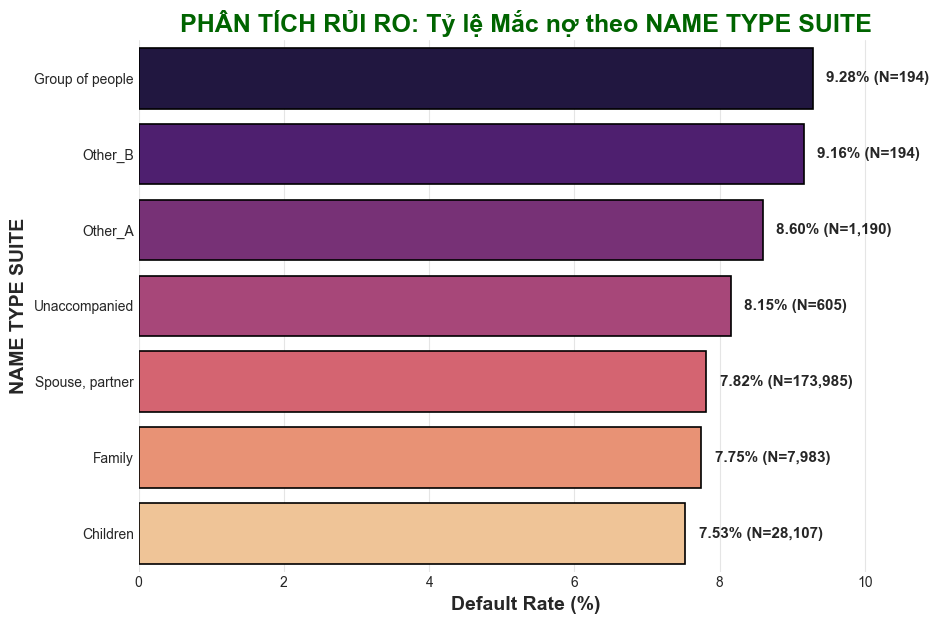

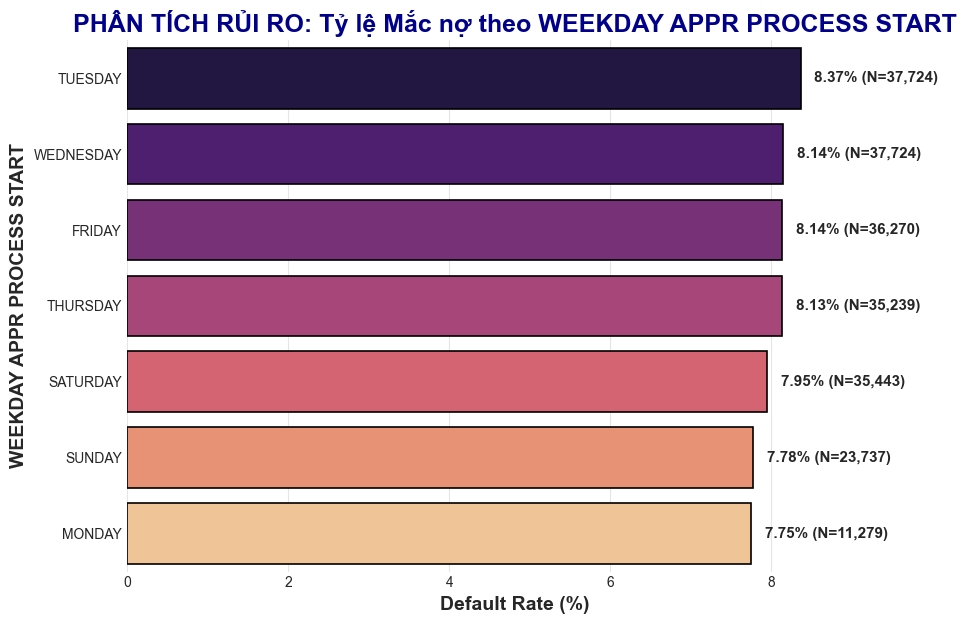

In [66]:


# --- KHỞI TẠO BIẾN CẦN VẼ (ĐẢM BẢO CÁC CỘT NÀY TỒN TẠI TRONG df_prep CỦA BẠN) ---
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START'
]

# --- HÀM TÍNH TOÁN VÀ VẼ BIỂU ĐỒ DEFAULT RATE CHUẨN ---

def plot_default_rate_individual(df: pd.DataFrame, col: str, title_color: str = 'darkred'):
    """
    Tính toán và vẽ biểu đồ Default Rate (%) cho từng danh mục của một biến.
    
    Công thức: Default Rate = (Số khách hàng default / Tổng số khách hàng trong nhóm) * 100
    """
    
    # 1. TÍNH TOÁN DEFAULT RATE
    # df.groupby(col)['TARGET'].mean() tính toán tỷ lệ Default Rate chính xác
    default_rate = df.groupby(col)['TARGET'].mean().reset_index()
    default_rate['Default_Rate_Percent'] = default_rate['TARGET'] * 100
    
    # Lấy thêm cột Count (Tổng số khách hàng)
    total_count = df.groupby(col)['TARGET'].count().reset_index().rename(columns={'TARGET': 'Total_Count'})
    default_rate = pd.merge(default_rate, total_count, on=col)
    
    # Sắp xếp theo tỷ lệ Default giảm dần
    default_rate = default_rate.sort_values(by='Default_Rate_Percent', ascending=False)
    
    # --- 2. VẼ BIỂU ĐỒ BAR ---
    
    sns.set_style("whitegrid")
    # Điều chỉnh kích thước hình dựa trên số lượng danh mục để tránh quá nhỏ
    plt.figure(figsize=(10, default_rate.shape[0] * 0.7 + 2)) 

    bars = sns.barplot(
        x='Default_Rate_Percent',
        y=col,
        data=default_rate,
        palette='magma', # Bảng màu phân biệt
        edgecolor='black',
        linewidth=1.2
    )
    
    # Thêm Annotation (Tỷ lệ Default % và Số lượng N)
    max_rate = default_rate['Default_Rate_Percent'].max()
    for p in bars.patches:
        rate = p.get_width()
        
        # Lấy count tương ứng: Tìm Total_Count của danh mục đó
        # (p.get_y() cho vị trí của thanh, cần ánh xạ lại về index của DataFrame đã sắp xếp)
        category_name = default_rate[col].iloc[int(p.get_y())] 
        count_val = default_rate.loc[default_rate[col] == category_name, 'Total_Count'].iloc[0]
        
        # Chuỗi hiển thị: "XX.XX% (N=YYY)"
        annotation_text = f'{rate:.2f}% (N={count_val:,})'
        
        x = rate + max_rate * 0.02 
        y = p.get_y() + p.get_height()/2
        bars.text(x, y, annotation_text, va='center', ha='left', fontsize=11, fontweight='bold')
    
    # Định dạng biểu đồ
    plt.title(f'PHÂN TÍCH RỦI RO: Tỷ lệ Mắc nợ theo {col.replace("_", " ")}', 
              fontsize=18, fontweight='bold', color=title_color)
    plt.xlabel('Default Rate (%)', fontsize=14, fontweight='bold')
    plt.ylabel(col.replace("_", " "), fontsize=14, fontweight='bold')
    plt.xlim(0, max_rate * 1.15)
    plt.grid(True, axis='x', alpha=0.5)
    
    plt.show()

# --- 3. GỌI HÀM VẼ TỪNG BIẾN RIÊNG LẺ SỬ DỤNG df_prep ĐÃ CÓ ---

# Ví dụ:
# df_prep = pd.read_csv('du_lieu_cua_ban.csv') # Nếu bạn tải từ file

# GỌI HÀM: Chạy từng dòng dưới đây để vẽ từng biểu đồ
plot_default_rate_individual(df_prep, 'NAME_CONTRACT_TYPE', title_color='darkred')
plot_default_rate_individual(df_prep, 'NAME_TYPE_SUITE', title_color='darkgreen')
plot_default_rate_individual(df_prep, 'WEEKDAY_APPR_PROCESS_START', title_color='darkblue')

--- Bảng Tổng hợp Tỷ lệ Default theo Loại Hợp đồng ---
  NAME_CONTRACT_TYPE   Count  Total_Default  Default_Rate_%
0         Cash loans  194860          16242            8.34
1    Revolving loans   20398           1136            5.57


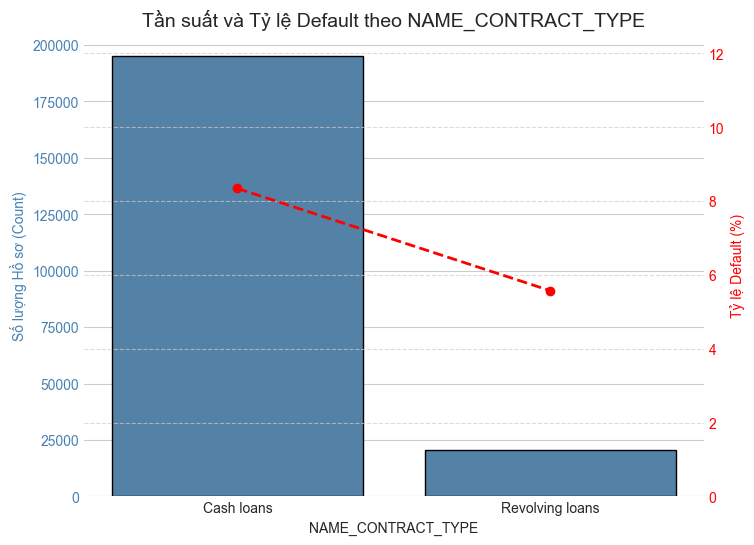

In [67]:


# --- Giả định: DataFrame của bạn có tên là 'df' ---

# 1. Tính toán Tỷ lệ Default (Default Rate) và Tần suất (Count)

# Gộp nhóm theo NAME_CONTRACT_TYPE và tính toán:
# - Số lượng hồ sơ (Count)
# - Tổng số hồ sơ mắc nợ (Sum of TARGET)
df_analysis = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['count', 'sum']).reset_index()

# Đổi tên cột để dễ hiểu hơn
df_analysis.columns = ['NAME_CONTRACT_TYPE', 'Count', 'Total_Default']

# Tính toán Tỷ lệ Default (%)
df_analysis['Default_Rate_%'] = (df_analysis['Total_Default'] / df_analysis['Count']) * 100

# Làm tròn tỷ lệ cho đẹp
df_analysis['Default_Rate_%'] = df_analysis['Default_Rate_%'].round(2)

print("--- Bảng Tổng hợp Tỷ lệ Default theo Loại Hợp đồng ---")
print(df_analysis)

# 2. Chuẩn bị Dữ liệu cho Trực quan hóa

# Sử dụng một cột riêng cho tỷ lệ % để vẽ trên trục Y thứ cấp (Secondary Y-axis)
# Đây là bước cần thiết cho biểu đồ kép (dual-axis plot)

# 3. Biểu diễn Trực quan (Biểu đồ Kép: Count vs Default Rate)

# Khởi tạo figure và axes chính
fig, ax1 = plt.subplots(figsize=(8, 6))

# Vẽ Count (Tần suất) trên trục Y chính (Trái)
sns.barplot(
    x='NAME_CONTRACT_TYPE',
    y='Count',
    data=df_analysis,
    ax=ax1,
    color='steelblue',
    edgecolor='black'
)
ax1.set_ylabel('Số lượng Hồ sơ (Count)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Khởi tạo trục Y phụ (Phải) cho Tỷ lệ Default Rate
ax2 = ax1.twinx() 
ax2.plot(
    df_analysis['NAME_CONTRACT_TYPE'],
    df_analysis['Default_Rate_%'],
    color='red',
    marker='o',
    linewidth=2,
    linestyle='--'
)
ax2.set_ylabel('Tỷ lệ Default (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, df_analysis['Default_Rate_%'].max() * 1.5) # Đặt giới hạn trục Y phụ

# Đặt tiêu đề
plt.title('Tần suất và Tỷ lệ Default theo NAME_CONTRACT_TYPE', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Bảng Tổng hợp Tỷ lệ Phổ biến Sản phẩm ---
  NAME_CONTRACT_TYPE   Count  Penetration_Rate_%
0         Cash loans  194860                90.5
1    Revolving loans   20398                 9.5


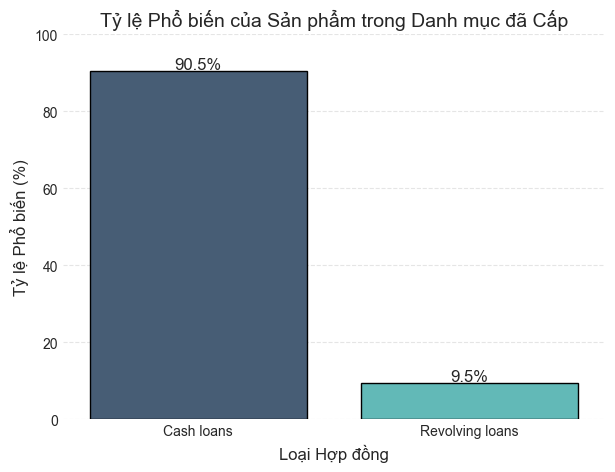

In [68]:


# --- Giả định: DataFrame của bạn có tên là 'df' ---

# 1. Tính toán Tần suất (Count) và Tỷ lệ Phổ biến (Penetration Rate)

# Tính tổng số hồ sơ trong tập dữ liệu đã cấp vay
total_applications = len(df)

# Gộp nhóm theo NAME_CONTRACT_TYPE và tính toán:
# - Số lượng hồ sơ (Count)
df_product_rate = df.groupby('NAME_CONTRACT_TYPE').size().reset_index(name='Count')

# Tính toán Tỷ lệ Phổ biến (%)
df_product_rate['Penetration_Rate_%'] = (df_product_rate['Count'] / total_applications) * 100

# Làm tròn tỷ lệ cho đẹp
df_product_rate['Penetration_Rate_%'] = df_product_rate['Penetration_Rate_%'].round(1)

print("--- Bảng Tổng hợp Tỷ lệ Phổ biến Sản phẩm ---")
print(df_product_rate)

# 2. Biểu diễn Trực quan (Bar Plot)

plt.figure(figsize=(7, 5))
sns.barplot(
    x='NAME_CONTRACT_TYPE',
    y='Penetration_Rate_%',
    data=df_product_rate,
    palette=['#3F5D7D', '#54C7C5'],  # Màu sắc cho dễ phân biệt
    edgecolor='black'
)

# Thêm nhãn giá trị lên trên mỗi thanh
for index, row in df_product_rate.iterrows():
    plt.text(
        index,
        row['Penetration_Rate_%'] + 0.5,  # Vị trí y cao hơn một chút
        f"{row['Penetration_Rate_%']}%",
        ha='center',
        fontsize=12
    )

plt.title('Tỷ lệ Phổ biến của Sản phẩm trong Danh mục đã Cấp', fontsize=14)
plt.ylabel('Tỷ lệ Phổ biến (%)', fontsize=12)
plt.xlabel('Loại Hợp đồng', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

LỖI: Không tìm thấy cột 'NAME_TYPE_SUITE_PROCESSED' trong df_prep. Vui lòng đảm bảo cột phân loại đã xử lý đã được tạo.
Sử dụng cột gốc 'NAME_TYPE_SUITE' thay thế.
--- Bảng Tổng hợp Rủi ro theo NAME_TYPE_SUITE (Sau xử lý) ---
        Suite_Type   Count  Default_Rate  Default_Rate_%
2  Group of people     194      0.092784        9.278351
4          Other_B    1190      0.091597        9.159664
3          Other_A     605      0.085950        8.595041
6    Unaccompanied  173985      0.081484        8.148404
5  Spouse, partner    7983      0.078166        7.816610
1           Family   28107      0.077454        7.745402
0         Children    2312      0.075260        7.525952


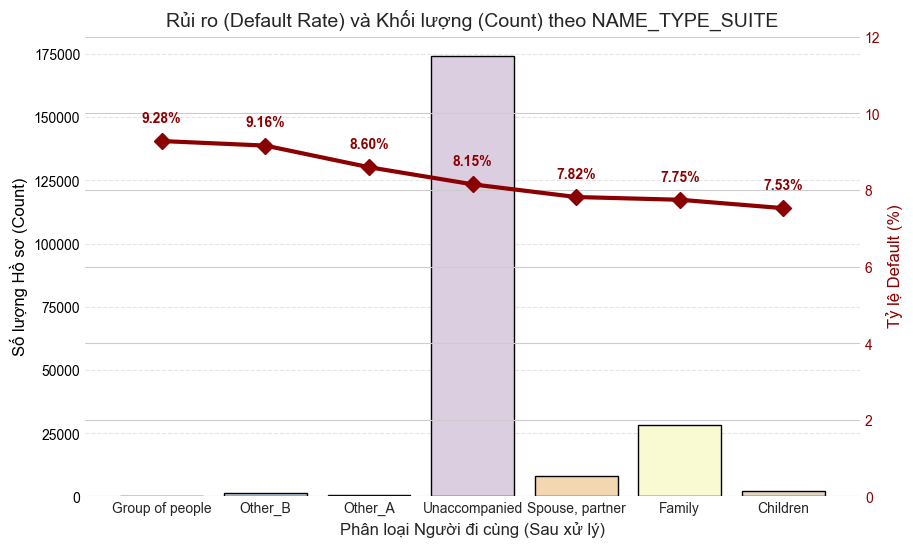

In [69]:

# --- 1. Tạo biến phân loại đã xử lý (Giả định bước này đã được thực hiện trong df_prep) ---
# Nếu cột đã có sẵn, bạn có thể bỏ qua bước này.
# Giả sử cột cuối cùng trong df_prep được sử dụng là 'NAME_TYPE_SUITE_PROCESSED'.
# Nếu biến gốc là 'NAME_TYPE_SUITE', bạn cần đảm bảo nó đã được xử lý Missing và Rare/Minority groups.

# Vì không thấy dữ liệu, tôi tạm giả định tên cột là 'NAME_TYPE_SUITE_PROCESSED'
# và gộp các giá trị hiếm/thiếu (nếu biến gốc là 'NAME_TYPE_SUITE')
def process_suite(suite):
    if pd.isna(suite) or suite in ['Unknown', 'XNA']:
        return 'Unknown'
    elif suite in ['Spouse, partner', 'Children', 'Other_A', 'Other_B', 'Group of people']:
        return 'RARE_SUITE'
    else:
        return suite

# Nếu df_prep của bạn chưa có cột xử lý:
# df_prep['NAME_TYPE_SUITE_PROCESSED'] = df_prep['NAME_TYPE_SUITE'].apply(process_suite)

# Sử dụng cột đã xử lý:
processed_column = 'NAME_TYPE_SUITE_PROCESSED'
if processed_column not in df_prep.columns:
    print(f"LỖI: Không tìm thấy cột '{processed_column}' trong df_prep. Vui lòng đảm bảo cột phân loại đã xử lý đã được tạo.")
    # Thử sử dụng biến gốc nếu có
    if 'NAME_TYPE_SUITE' in df_prep.columns:
        print("Sử dụng cột gốc 'NAME_TYPE_SUITE' thay thế.")
        processed_column = 'NAME_TYPE_SUITE'
    else:
        # Dừng lại nếu không có cột nào
        exit()

# --- 2. Tính toán Tỷ lệ Default (KPI: Default Rate) và Tần suất ---

# Gộp nhóm và tính toán:
df_suite_risk = df_prep.groupby(processed_column)['TARGET'].agg(['count', 'mean']).reset_index()

# Đổi tên cột và tính phần trăm
df_suite_risk.columns = ['Suite_Type', 'Count', 'Default_Rate']
df_suite_risk['Default_Rate_%'] = df_suite_risk['Default_Rate'] * 100

# Sắp xếp theo Tỷ lệ Default để dễ phân tích rủi ro (Order Analysis)
df_suite_risk = df_suite_risk.sort_values(by='Default_Rate_%', ascending=False)

print("--- Bảng Tổng hợp Rủi ro theo NAME_TYPE_SUITE (Sau xử lý) ---")
print(df_suite_risk)

# --- 3. Biểu diễn Trực quan (Biểu đồ Kép: Count vs Default Rate) ---

# Chuẩn bị thứ tự cho biểu đồ
order = df_suite_risk['Suite_Type'].tolist()

fig, ax1 = plt.subplots(figsize=(10, 6))

# 3a. Vẽ Count (Tần suất) trên trục Y chính (Trái)
sns.barplot(
    x='Suite_Type',
    y='Count',
    data=df_suite_risk,
    ax=ax1,
    palette='Pastel1',
    order=order,
    edgecolor='black'
)
ax1.set_ylabel('Số lượng Hồ sơ (Count)', color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

# 3b. Khởi tạo trục Y phụ (Phải) cho Tỷ lệ Default Rate
ax2 = ax1.twinx()
ax2.plot(
    df_suite_risk['Suite_Type'],
    df_suite_risk['Default_Rate_%'],
    color='darkred',
    marker='D', # Marker hình kim cương
    linewidth=3,
    linestyle='-',
    markersize=8,
    label='Default Rate (%)'
)
ax2.set_ylabel('Tỷ lệ Default (%)', color='darkred', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0, df_suite_risk['Default_Rate_%'].max() * 1.3)

# Thêm nhãn Default Rate lên trên đường line
for i, row in df_suite_risk.iterrows():
    ax2.text(
        row['Suite_Type'],
        row['Default_Rate_%'] + 0.5,
        f"{row['Default_Rate_%']:.2f}%",
        color='darkred',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Đặt tiêu đề và nhãn
ax1.set_xlabel('Phân loại Người đi cùng (Sau xử lý)', fontsize=12)
plt.title('Rủi ro (Default Rate) và Khối lượng (Count) theo NAME_TYPE_SUITE', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [70]:
df_prep['HOUR_APPR_PROCESS_START'].value_counts()

HOUR_APPR_PROCESS_START
10    26448
11    26055
12    23953
13    21665
14    19415
9     19165
15    17478
16    14133
8     10573
17    10457
18     6363
7      6334
6      4110
19     2689
5      2555
4      1458
3       864
20      846
21      262
2       201
22      114
1        58
23       31
0        31
Name: count, dtype: int64

--- Bảng Tổng hợp Rủi ro theo Từng Giờ (0-23) ---
    Hour  Count  Default_Rate  Default_Rate_%
0      0     31      0.193548       19.354839
1      1     58      0.068966        6.896552
2      2    201      0.114428       11.442786
3      3    864      0.085648        8.564815
4      4   1458      0.085048        8.504801
5      5   2555      0.107241       10.724070
6      6   4110      0.108516       10.851582
7      7   6334      0.101674       10.167351
8      8  10573      0.089284        8.928403
9      9  19165      0.082494        8.249413
10    10  26448      0.080724        8.072444
11    11  26055      0.081213        8.121282
12    12  23953      0.081827        8.182691
13    13  21665      0.079206        7.920609
14    14  19415      0.078599        7.859902
15    15  17478      0.077354        7.735439
16    16  14133      0.074719        7.471874
17    17  10457      0.064646        6.464569
18    18   6363      0.069150        6.914977
19    19   2689      0.071030 

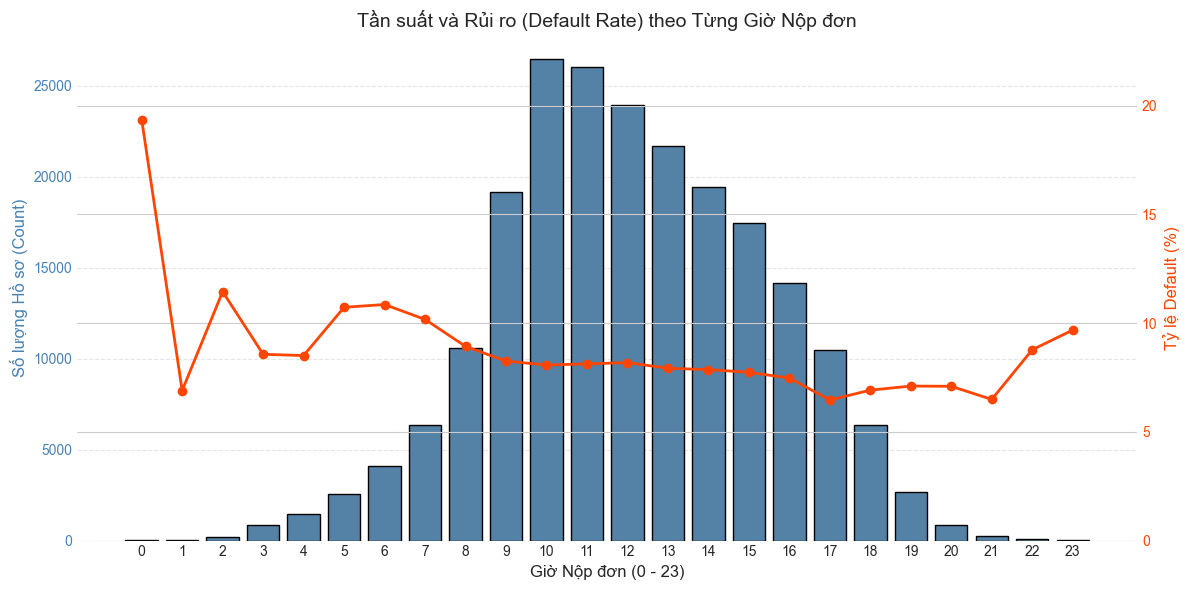

In [82]:

# Giả định df_prep đã có sẵn và chứa cột 'HOUR_APPR_PROCESS_START' và 'TARGET'

# --- 1. Tính toán Rủi ro (Default Rate) và Tần suất cho Từng Giờ ---

# Gộp nhóm theo Từng Giờ và tính toán Count, Default Rate (mean của TARGET)
df_hourly_analysis = df_prep.groupby('HOUR_APPR_PROCESS_START')['TARGET'].agg(['count', 'mean']).reset_index()

# Đổi tên cột và tính phần trăm
df_hourly_analysis.columns = ['Hour', 'Count', 'Default_Rate']
df_hourly_analysis['Default_Rate_%'] = df_hourly_analysis['Default_Rate'] * 100

print("--- Bảng Tổng hợp Rủi ro theo Từng Giờ (0-23) ---")
print(df_hourly_analysis)

# --- 2. Biểu diễn Trực quan (Biểu đồ Kép: Count vs Default Rate) ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# 2a. Vẽ Count (Tần suất) trên trục Y chính (Trái)
# Sử dụng Bar Plot để thể hiện Khối lượng
sns.barplot(
    x='Hour',
    y='Count',
    data=df_hourly_analysis,
    ax=ax1,
    color='steelblue',
    edgecolor='black'
)
ax1.set_ylabel('Số lượng Hồ sơ (Count)', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlabel('Giờ Nộp đơn (0 - 23)', fontsize=12)

# 2b. Khởi tạo trục Y phụ (Phải) cho Tỷ lệ Default Rate
ax2 = ax1.twinx()
# Sử dụng Line Plot để thể hiện xu hướng rủi ro
ax2.plot(
    df_hourly_analysis['Hour'].astype(str), # Chuyển sang chuỗi để khớp với trục x của Bar Plot
    df_hourly_analysis['Default_Rate_%'],
    color='orangered',
    marker='o',
    linewidth=2,
    linestyle='-',
    markersize=6,
    label='Default Rate (%)'
)
ax2.set_ylabel('Tỷ lệ Default (%)', color='orangered', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orangered')
ax2.set_ylim(0, df_hourly_analysis['Default_Rate_%'].max() * 1.2)

# Đặt tiêu đề
plt.title('Tần suất và Rủi ro (Default Rate) theo Từng Giờ Nộp đơn', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
df_prep['AMT_INCOME_TOTAL'].describe()

count    2.152580e+05
mean     1.688900e+05
std      2.745586e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
df_prep.loc[:,"AMT_INCOME_TOTAL"] = pd.to_numeric(df_prep["AMT_INCOME_TOTAL"], errors='coerce')

In [74]:
df_prep['AMT_INCOME_TOTAL'].describe()

count    2.152580e+05
mean     1.688900e+05
std      2.745586e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

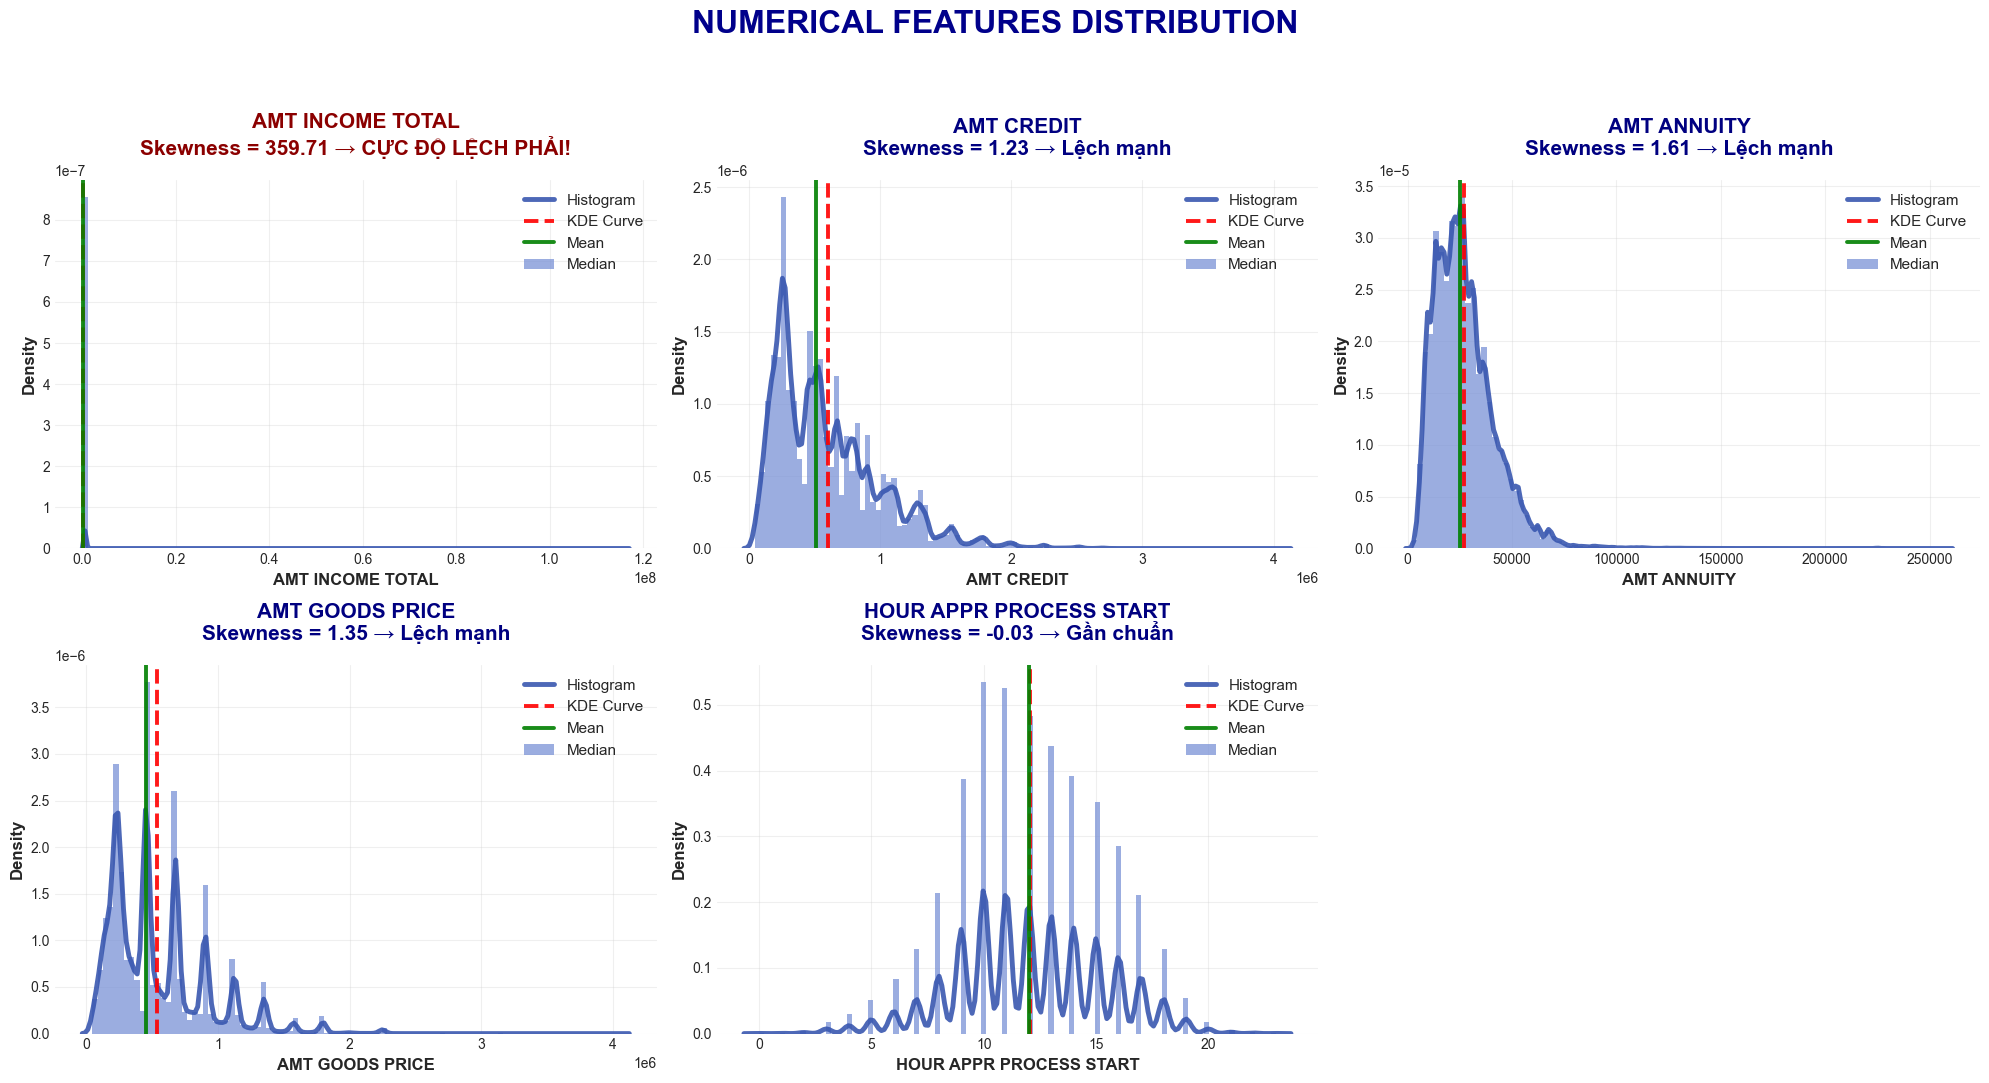

In [75]:
# === BIẾN NUMERICAL + ĐƯỜNG KDE ĐẸP NHƯ TRONG BÁO CÁO ===
numerical_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT', 
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'HOUR_APPR_PROCESS_START'
]
for col in numerical_cols:
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')

n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 11))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    

    sns.histplot(data=df_prep, x=col, ax=ax, 
                 color="#7A92D6", alpha=0.75,
                 bins=100, linewidth=0, kde=False, stat="density", label='Histogram')

    sns.kdeplot(data=df_prep, x=col, ax=ax, 
                color="#3957B0", linewidth=3.5, 
                bw_adjust=0.8, alpha=0.9, label='KDE (Density Curve)')
    
    # Mean & Median
    mean_val = df_prep[col].mean()
    median_val = df_prep[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.8, alpha=0.9)
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2.8, alpha=0.9)
    
    # Skewness
    skew_val = df_prep[col].skew()
    skew_text = f'Skewness = {skew_val:.2f}'
    if abs(skew_val) > 50:
        skew_text += ' → CỰC ĐỘ LỆCH PHẢI!'
    elif abs(skew_val) > 10:
        skew_text += ' → CỰC LỆCH!'
    elif abs(skew_val) > 1:
        skew_text += ' → Lệch mạnh'
    else:
        skew_text += ' → Gần chuẩn'
    
    title_color = 'darkred' if abs(skew_val) > 10 else 'navy'
    ax.set_title(f'{col.replace("_", " ")}\n{skew_text}', 
                 fontsize=15, fontweight='bold', color=title_color, pad=18)
    
    ax.set_xlabel(col.replace('_', ' '), fontsize=12, fontweight='bold')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold')  
    ax.grid(True, alpha=0.3)
    
    # Legend đẹp + đầy đủ
    ax.legend(['Histogram', 'KDE Curve', 'Mean', 'Median'], 
              fontsize=11, loc='upper right', fancybox=True, shadow=True)

# Ẩn ô trống
axes[-1].set_visible(False)

plt.suptitle('NUMERICAL FEATURES DISTRIBUTION', 
             fontsize=23, fontweight='bold', color='darkblue', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

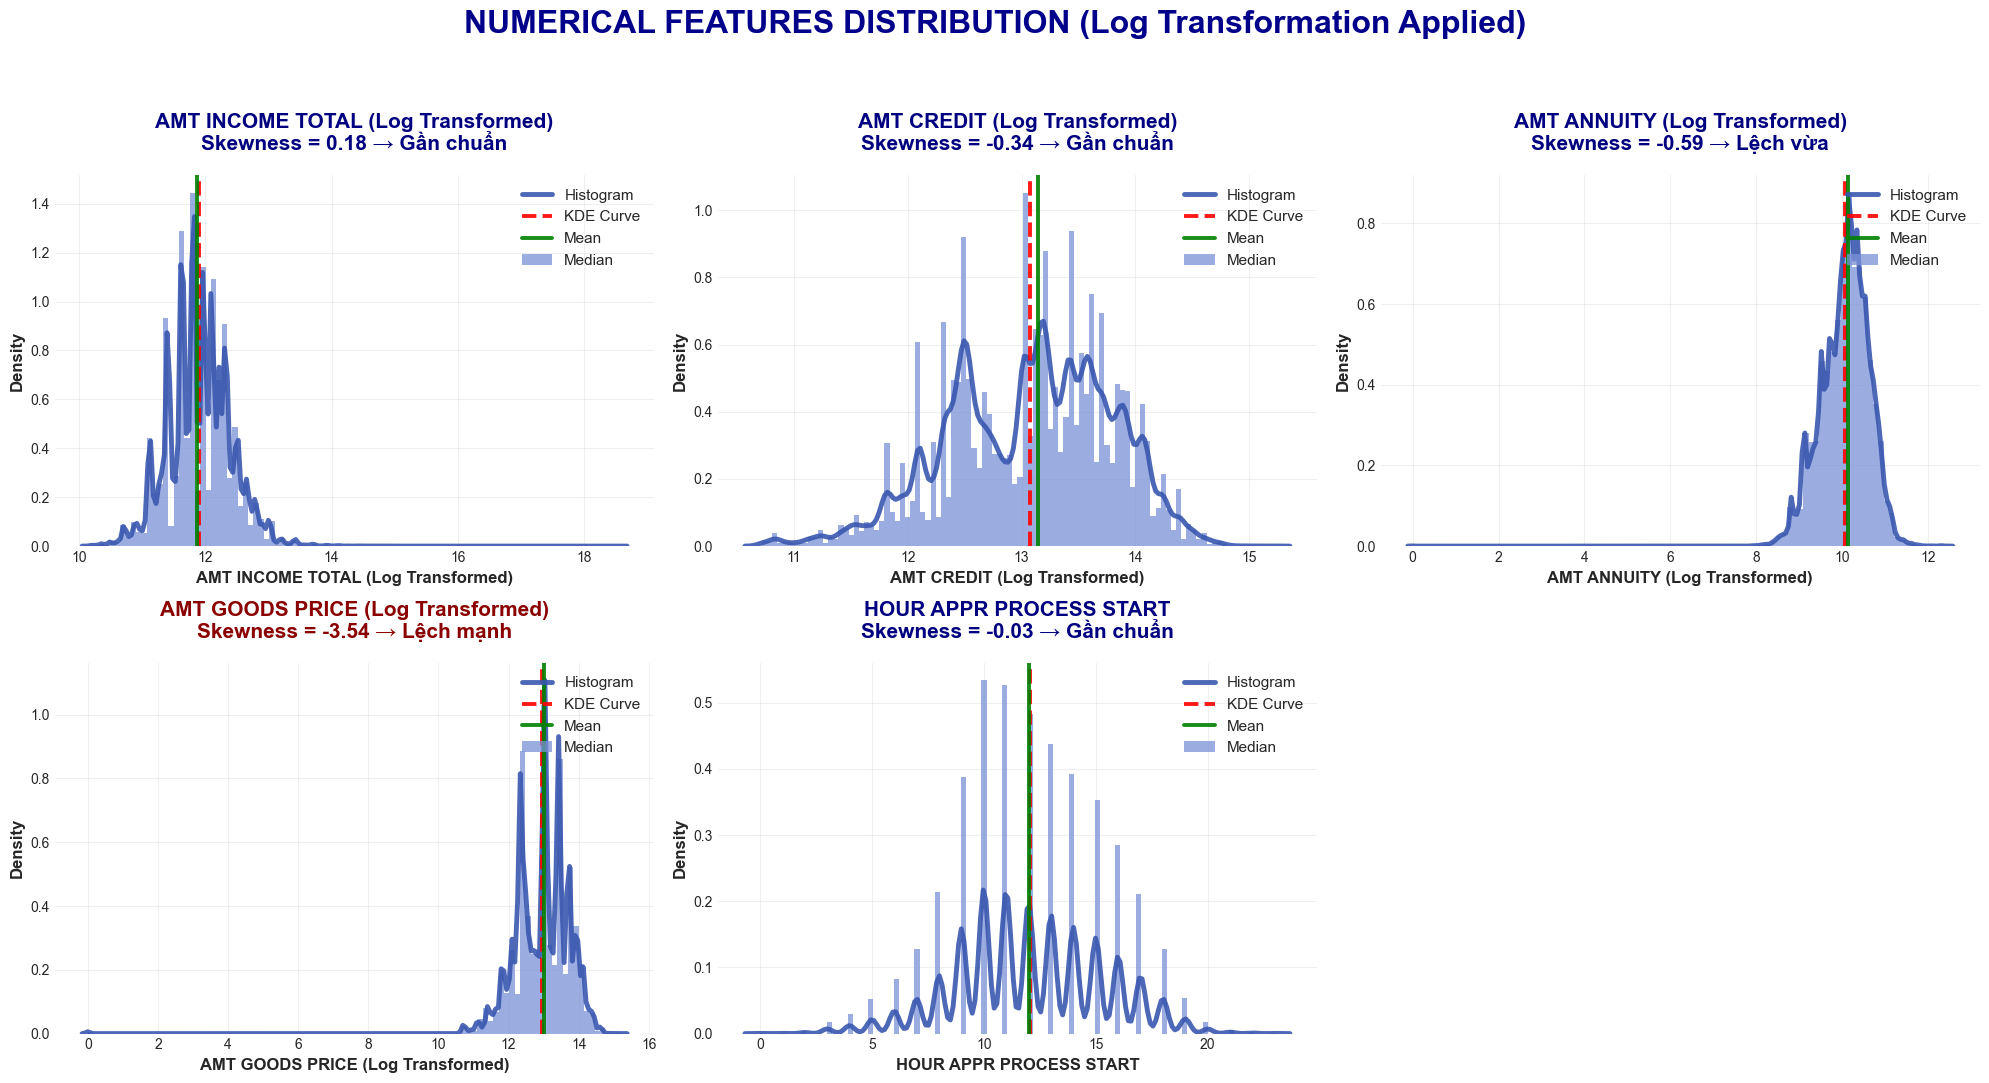

In [76]:

# Giả định: DataFrame df_prep đã được load và tồn tại.
# Nếu df_prep là kết quả của việc lọc/chọn, nên dùng .copy() để tránh SettingWithCopyWarning
# df_prep = df_prep.copy()

# 1. DANH SÁCH CỘT CẦN BIẾN ĐỔI (Log Transformation)
cols_to_transform = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT', 
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'
]
# Cột không cần biến đổi (chỉ là giá trị thời gian nhỏ)
col_no_transform = 'HOUR_APPR_PROCESS_START'

# 2. ÁP DỤNG BIẾN ĐỔI LOG (np.log1p)
for col in cols_to_transform:
    # Đảm bảo cột là số trước khi biến đổi
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')
    
    # Sử dụng np.log1p để giảm độ lệch, an toàn với giá trị 0
    # Điền giá trị thiếu (NaN) bằng 0 trước khi log, sau đó thêm 1 (log(1+x))
    df_prep[f'{col}_LOG'] = np.log1p(df_prep[col].fillna(0))

# 3. DANH SÁCH CỘT MỚI ĐỂ VẼ BIỂU ĐỒ
numerical_cols_transformed = [f'{col}_LOG' for col in cols_to_transform]
numerical_cols_transformed.append(col_no_transform)


# === CODE VẼ BIỂU ĐỒ CHO CÁC CỘT ĐÃ BIẾN ĐỔI ===
n_cols = 3
n_rows = 2 # Giả sử danh sách mới vẫn chỉ có 5 cột
if len(numerical_cols_transformed) > 3:
    n_rows = (len(numerical_cols_transformed) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 11))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_transformed):
    ax = axes[i]
    
    # 1. Vẽ Histogram
    sns.histplot(data=df_prep, x=col, ax=ax, 
                  color="#7A92D6", alpha=0.75,
                  bins=100, linewidth=0, kde=False, stat="density", label='Histogram')

    # 2. Vẽ KDE (Density Curve)
    sns.kdeplot(data=df_prep, x=col, ax=ax, 
                  color="#3957B0", linewidth=3.5, 
                  bw_adjust=0.8, alpha=0.9, label='KDE (Density Curve)')
    
    # 3. Xử lý định dạng trục x cho cột không Log (ví dụ: HOUR_APPR_PROCESS_START)
    if not col.endswith('_LOG'):
        # Áp dụng cho cột không biến đổi Log để hiển thị số gốc (ví dụ: HOUR_APPR_PROCESS_START)
        ax.ticklabel_format(style='plain', axis='x')
    
    # 4. Mean & Median
    mean_val = df_prep[col].mean()
    median_val = df_prep[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.8, alpha=0.9)
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2.8, alpha=0.9)
    
    # 5. Skewness
    skew_val = df_prep[col].skew()
    skew_text = f'Skewness = {skew_val:.2f}'
    
    # Cập nhật hiển thị Skewness dựa trên giá trị mới (sau Log)
    if abs(skew_val) > 10:
        skew_text += ' → LỆCH CỰC ĐỘ!'
    elif abs(skew_val) > 1:
        skew_text += ' → Lệch mạnh'
    elif abs(skew_val) > 0.5:
        skew_text += ' → Lệch vừa'
    else:
        skew_text += ' → Gần chuẩn'
        
    title_color = 'darkred' if abs(skew_val) > 1 else 'navy'
    
    # Cập nhật tiêu đề để phản ánh biến đổi Log
    display_name = col.replace("_", " ").replace(" LOG", " (Log Transformed)")
    ax.set_title(f'{display_name}\n{skew_text}', 
                  fontsize=15, fontweight='bold', color=title_color, pad=18)
    
    ax.set_xlabel(display_name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold')  
    ax.grid(True, alpha=0.3)
    
    # 6. Legend
    ax.legend(['Histogram', 'KDE Curve', 'Mean', 'Median'], 
              fontsize=11, loc='upper right', fancybox=True, shadow=True)

# Ẩn ô trống nếu có
for i in range(len(numerical_cols_transformed), n_rows * n_cols):
    axes[i].set_visible(False)

plt.suptitle('NUMERICAL FEATURES DISTRIBUTION (Log Transformation Applied)', 
             fontsize=23, fontweight='bold', color='darkblue', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## **2. EXPLANATION**

In [77]:

print("=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===\n")
print(f"Tổng số dòng: {len(df_prep):,}")
print(f"Số missing AMT_GOODS_PRICE: {df_prep['AMT_GOODS_PRICE'].isnull().sum():,} "
      f"({df_prep['AMT_GOODS_PRICE'].isnull().mean()*100:.3f}%)\n")

result = (df_prep.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_GOODS        = ('AMT_GOODS_PRICE', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_GOODS    = ('AMT_GOODS_PRICE', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_GOODS'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_GOODS', 'Not_Missing_GOODS', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===

Tổng số dòng: 215,258
Số missing AMT_GOODS_PRICE: 174 (0.081%)

                    Total_rows  Missing_GOODS  Not_Missing_GOODS  \
NAME_CONTRACT_TYPE                                                 
Cash loans              194860              0             194860   
Revolving loans          20398            174              20224   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.000  
Revolving loans               0.853  


In [78]:
print("=== PHÂN TÍCH MISSING AMT_ANNUITY ===\n")
print(f"Tổng số dòng: {len(df_prep):,}")
print(f"Số missing AMT_ANNUITY: {df_prep['AMT_ANNUITY'].isnull().sum():,} "
      f"({df_prep['AMT_ANNUITY'].isnull().mean()*100:.3f}%)\n")

result = (df_prep.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_ANNUITY        = ('AMT_ANNUITY', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_ANNUITY   = ('AMT_ANNUITY', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_ANNUITY'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_ANNUITY', 'Not_Missing_ANNUITY', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_ANNUITY ===

Tổng số dòng: 215,258
Số missing AMT_ANNUITY: 9 (0.004%)

                    Total_rows  Missing_ANNUITY  Not_Missing_ANNUITY  \
NAME_CONTRACT_TYPE                                                     
Cash loans              194860                9               194851   
Revolving loans          20398                0                20398   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.005  
Revolving loans               0.000  


In [79]:
print("TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY\n" + "="*50)

# Tính tỷ lệ TARGET=1 (vỡ nợ) theo từng nhóm
default_rate = df_prep.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100

for contract_type, rate in default_rate.items():
    count = len(df_prep[df_prep['NAME_CONTRACT_TYPE'] == contract_type])
    bad = df_prep[(df_prep['NAME_CONTRACT_TYPE'] == contract_type) & (df_prep['TARGET'] == 1)].shape[0]
    print(f"{contract_type:15} → {rate:5.2f}% vỡ nợ "
          f"({bad:,} người vỡ nợ / {count:,} người)")

TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY
Cash loans      →  8.34% vỡ nợ (16,242 người vỡ nợ / 194,860 người)
Revolving loans →  5.57% vỡ nợ (1,136 người vỡ nợ / 20,398 người)


### Explain the each features

| Tên biến | Ý nghĩa của biến | Note |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **ID** | Mã định danh duy nhất của mỗi hồ sơ vay                                       | • 100% unique (215258 giá trị khác nhau)<br> |
| **TARGET** | Kết quả cuối cùng ngân hàng quan tâm nhất:<br>• 0 = khách hàng trả nợ đúng hạn<br>• 1 = khách hàng bị trễ nợ quá X ngày trong Y kỳ đầu | • Là biến mục tiêu cần dự đoán<br> |
| **NAME_CONTRACT_TYPE** | Loại khoản vay mà khách hàng chọn:<br>• Cash loans = vay tiền mặt, cầm tiền về xài<br>• Revolving loans = giống thẻ tín dụng, có hạn mức rút dần |• Cash loans chiếm ~90–91%<br>• Revolving loans có tỷ lệ vỡ nợ thấp hơn hẳn (~5–6% so với ~8–9% của Cash loans) → biến mạnh |
| **AMT_INCOME_TOTAL** | Thu nhập hàng tháng do khách hàng tự khai (bao gồm lương, kinh doanh, cho thuê…) | • Bị lệch phải cực mạnh (max = 117 triệu!)<br>• Người default thường thu nhập thấp hơn 20–30%<br>• Bắt buộc log transform<br>• Nên tạo tỷ lệ với CREDIT/ANNUITY |
| **AMT_CREDIT** | Số tiền ngân hàng thực tế duyệt và cho vay (sau khi xét hồ sơ) | • Bị lệch phải mạnh<br>• Người default thường được duyệt ít tiền hơn<br>• Tỷ lệ CREDIT/INCOME là một trong những feature mạnh nhất cuộc thi |
| **AMT_ANNUITY** | Số tiền khách phải trả cố định mỗi tháng (gồm cả gốc và lãi) | • Bị lệch phải<br>• Tỷ lệ ANNUITY/INCOME (gánh nặng trả góp) là feature cực mạnh<br>• Càng cao → càng dễ vỡ nợ |
| **AMT_GOODS_PRICE** | Giá trị món hàng mà khách định mua bằng tiền vay (tivi, tủ lạnh, điện thoại…). `Nếu vay tiền mặt thì thường bằng hoặc gần bằng AMT_CREDIT` | • Missing value là do customer dùng khoản vay revolving nên sẽ không đánh giá được việc customer đó sẽ sử dụng số tiền đó cho mục đích gì-> giá trị món hàng không được ghi nhận |
| **NAME_TYPE_SUITE** | Khi nộp hồ sơ, khách đi một mình hay có người đi cùng? (Unaccompanied, Family, Spouse, Children, Group of people…) | • Missing value có thể là do khách hàng đăng nhập bằng trực tuyến(online, ATM,... ) hoặc là không đi cùng ai nên để trống |
| **WEEKDAY_APPR_PROCESS_START** | Thứ trong tuần mà khách đến nộp hồ sơ (MONDAY → SUNDAY) | • 7 giá trị<br>• Chênh lệch tỷ lệ default giữa các thứ rất nhỏ (< 0.5%)|
| **HOUR_APPR_PROCESS_START** | Giờ trong ngày (0–23h) mà khách nộp hồ sơ | • Giờ quá sớm (< 7h) hoặc quá muộn (> 18h) có tỷ lệ default cao hơn nhẹ<br>• Nên chia bin: sáng (7–12), chiều (12–18), tối (sau 18h) hoặc cyclic encoding |


## **3. MISSING VALUE**

In [80]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df_prep[cols_group1].isnull().sum(),
    'missing_percent': df_prep[cols_group1].isnull().mean() * 100
})

missing_summary

,missing_count,missing_percent
TARGET,0,0.000000
ID,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
NAME_TYPE_SUITE,882,0.409741
WEEKDAY_APPR_PROCESS_START,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,9,0.004181
AMT_GOODS_PRICE,174,0.080833
HOUR_APPR_PROCESS_START,0,0.000000


#### XỬ LÍ MISSING VALUE

In [81]:
df_prep = df[cols_group1].copy()
#1 NAME_TYPE_SUITE - missing 882 giá trị(MAR))
df_prep['NAME_TYPE_SUITE_MISSING'] = df_prep['NAME_TYPE_SUITE'].isnull().astype(int)
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].fillna('Unknown') 

# 2. AMT_GOODS_PRICE – missing(MCAR) 174 giá trị
df_prep['GOODS_PRICE_WAS_MISSING'] = df_prep['AMT_GOODS_PRICE'].isnull().astype(int)
df_prep['AMT_GOODS_PRICE'] = df_prep['AMT_GOODS_PRICE'].fillna(df_prep['AMT_CREDIT'])

# 3. AMT_ANNUITY – chỉ 9 giá trị missing(MCAR) → fill bằng median để không bị mất dữ liệu của feature quan trọng
df_prep['AMT_ANNUITY_WAS_MISSING'] = df_prep['AMT_ANNUITY'].isnull().astype(int)
df_prep['AMT_ANNUITY'] = df_prep['AMT_ANNUITY'].fillna(df_prep['AMT_ANNUITY'].median())

# Kiểm tra lại 
print("Số missing sau khi xử lý:")
print(df_prep.isnull().sum())

TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

### `CHECK OUTLIER`

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

continuous_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

print("\n=== OUTLIER DETECTION - CONTINUOUS VARIABLES ===")
for col in continuous_cols:
    print(f"\n{col}")
    print("-" * 40)
    
    # IQR
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_out = ((df_prep[col] < Q1 - 1.5*IQR) | (df_prep[col] > Q3 + 1.5*IQR)).sum()
    
    # Z-score
    z_out = (np.abs(stats.zscore(df_prep[col].dropna())) > 3).sum()
    
    print(f"IQR outliers          : {iqr_out:,} ({iqr_out/len(df_prep):.2%})")
    print(f"Z-score |Z|>3 outliers: {z_out:,} ({z_out/len(df_prep[col].dropna()):.2%})")
    
    # Cap tại 99th percentile (khuyến nghị thực tế cho cuộc thi/ngân hàng)
    cap_value = df_prep[col].quantile(0.99)
    df_prep[f"{col}_capped"] = df_prep[col].clip(upper=cap_value)
    print(f"99th percentile value : {cap_value:,.0f} → sẽ dùng để cap")


=== OUTLIER DETECTION - CONTINUOUS VARIABLES ===

AMT_INCOME_TOTAL
----------------------------------------
IQR outliers          : 9,798 (4.55%)
Z-score |Z|>3 outliers: 181 (0.08%)
99th percentile value : 472,500 → sẽ dùng để cap

AMT_CREDIT
----------------------------------------
IQR outliers          : 4,615 (2.14%)
Z-score |Z|>3 outliers: 2,279 (1.06%)
99th percentile value : 1,848,577 → sẽ dùng để cap

AMT_ANNUITY
----------------------------------------
IQR outliers          : 5,223 (2.43%)
Z-score |Z|>3 outliers: 2,090 (0.97%)
99th percentile value : 70,263 → sẽ dùng để cap

AMT_GOODS_PRICE
----------------------------------------
IQR outliers          : 10,374 (4.82%)
Z-score |Z|>3 outliers: 2,912 (1.35%)
99th percentile value : 1,800,000 → sẽ dùng để cap



=== HOUR_APPR_PROCESS_START DISTRIBUTION ===
HOUR_APPR_PROCESS_START
0        31
1        58
2       201
3       864
4      1458
5      2555
6      4110
7      6334
8     10573
9     19165
10    26448
11    26055
12    23953
13    21665
14    19415
15    17478
16    14133
17    10457
18     6363
19     2689
20      846
21      262
22      114
23       31
Name: count, dtype: int64


C:\Users\tt\AppData\Local\Temp\ipykernel_8896\174806035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prep, x='HOUR_APPR_PROCESS_START', palette='viridis')


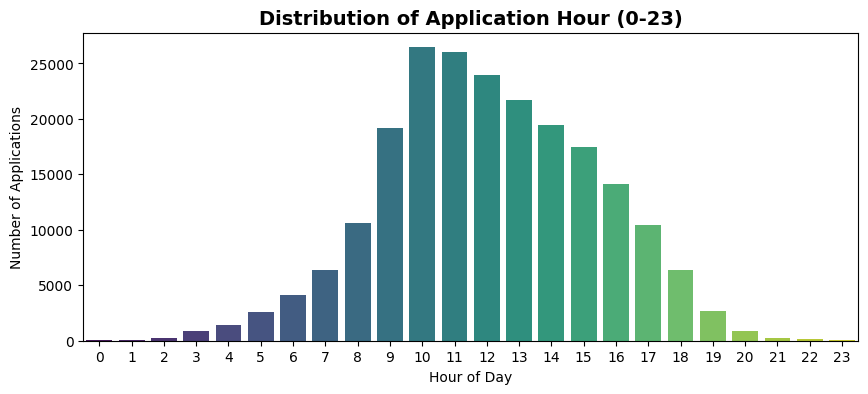

In [ ]:
print("\n=== HOUR_APPR_PROCESS_START DISTRIBUTION ===")
hour_dist = df_prep['HOUR_APPR_PROCESS_START'].value_counts().sort_index()
print(hour_dist)

# Visual
plt.figure(figsize=(10,4))
sns.countplot(data=df_prep, x='HOUR_APPR_PROCESS_START', palette='viridis')
plt.title('Distribution of Application Hour (0-23)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Applications')
plt.show()


df_prep['is_morning']   = df_prep['HOUR_APPR_PROCESS_START'].between(6, 11).astype(int)
df_prep['is_afternoon'] = df_prep['HOUR_APPR_PROCESS_START'].between(12, 17).astype(int)
df_prep['is_evening']   = df_prep['HOUR_APPR_PROCESS_START'].between(18, 23).astype(int)
df_prep['is_night']     = df_prep['HOUR_APPR_PROCESS_START'].between(0, 5).astype(int)

## **4. OUTLIER**

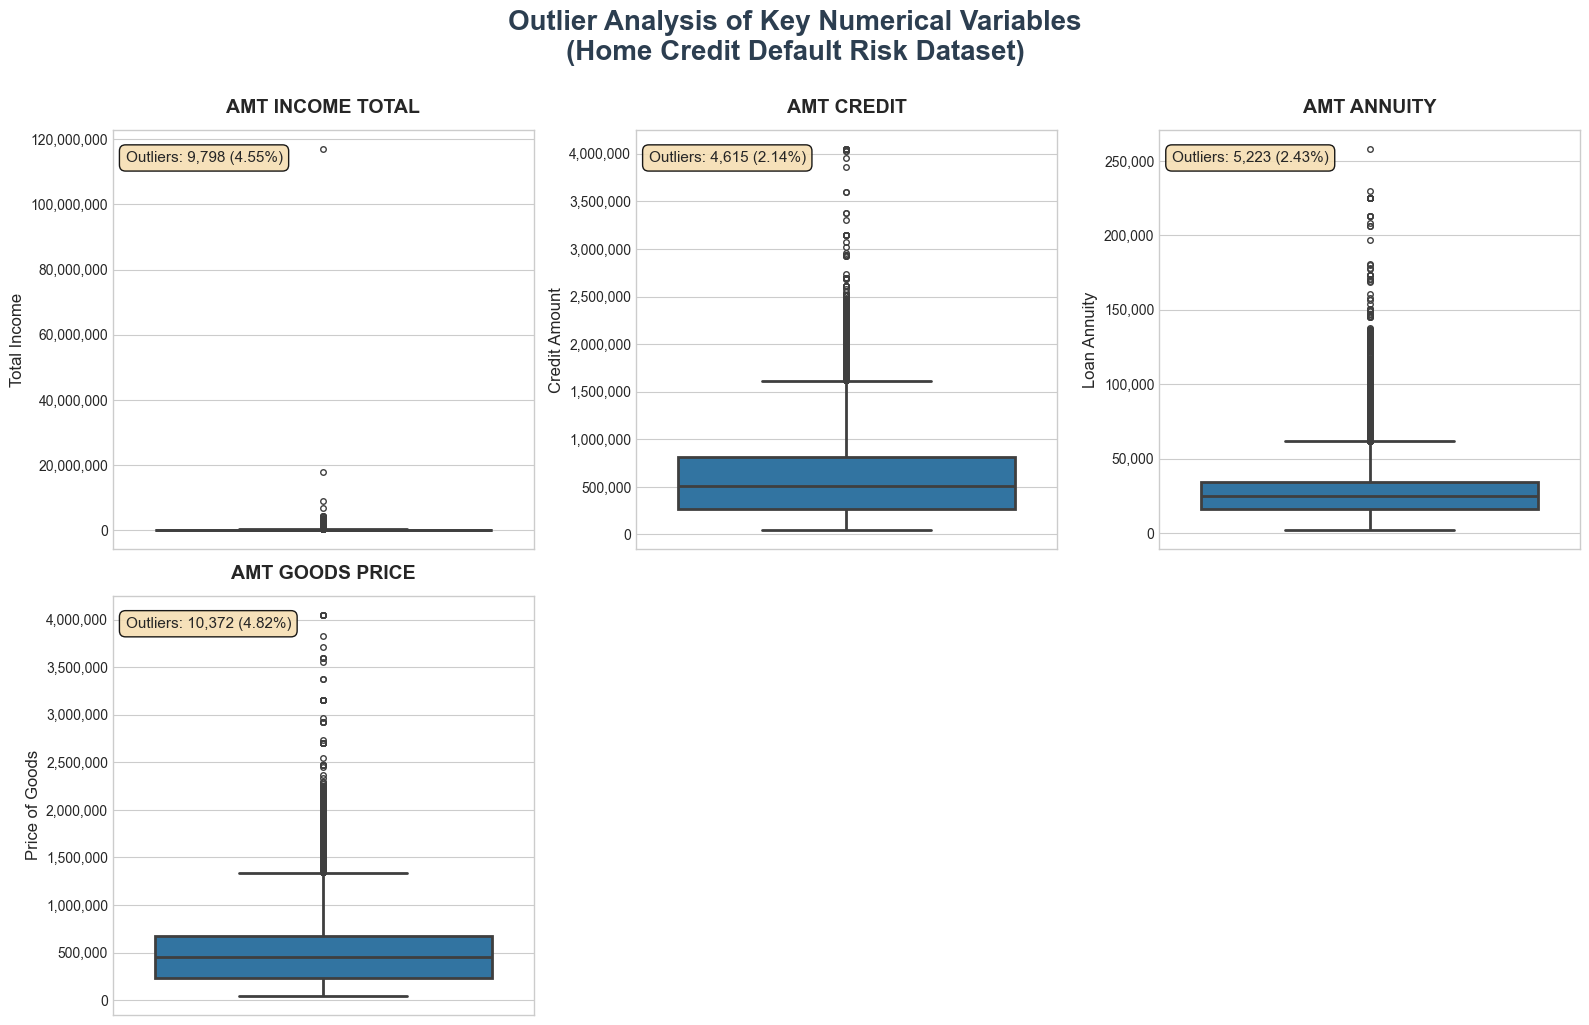

In [ ]:
# ORIGINAL OUTLIER 
numeric_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'] #hour_appr_process_start(discrete variance) removed because it has no outlier

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="#1f77b4", linewidth=2, fliersize=4)
    
    # IQR outlier calculation
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = 100 * outliers_count / len(df[col])
    
    ax = plt.gca()
    
    # Proper formatting for each variable (original units)
    if col == 'AMT_INCOME_TOTAL':
        ax.set_ylabel('Total Income', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_CREDIT':
        ax.set_ylabel('Credit Amount', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_ANNUITY':
        ax.set_ylabel('Loan Annuity', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_GOODS_PRICE':
        ax.set_ylabel('Price of Goods', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'HOUR_APPR_PROCESS_START':
        ax.set_ylabel('Hour of Application', fontsize=12)
        ax.set_yticks(np.arange(0, 25, 4))
        ax.set_ylim(-0.5, 23.5)
    
    # Title + outlier info
    plt.title(col.replace('_', ' '), fontsize=14, fontweight='bold', pad=12)
    plt.text(0.03, 0.95,
             f'Outliers: {outliers_count:,} ({outlier_pct:.2f}%)',
             transform=ax.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="wheat", alpha=0.9))

# Main title
plt.suptitle('Outlier Analysis of Key Numerical Variables\n'
             '(Home Credit Default Risk Dataset)',
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
print(df_prep['AMT_INCOME_TOTAL'].unique()[:20])
print(df_prep['AMT_INCOME_TOTAL'].describe())


[225000.  90000. 126000. 157500. 540000. 292500.  81000. 270000. 202500.
 162000. 112500. 303750. 146250. 117000. 119250.  67500. 135000. 166500.
 180000. 144000.]
count    2.152580e+05
mean     1.688900e+05
std      2.745586e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
df['AMT_INCOME_TOTAL'].describe()

count    2.152580e+05
mean     1.688900e+05
std      2.745586e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
df_prep['AMT_INCOME_TOTAL'].max()

np.float64(117000000.0)

In [ ]:
df['AMT_INCOME_TOTAL'].max()

np.float64(117000000.0)

In [ ]:
df_prep['AMT_ANNUITY'].max()

np.float64(258025.5)

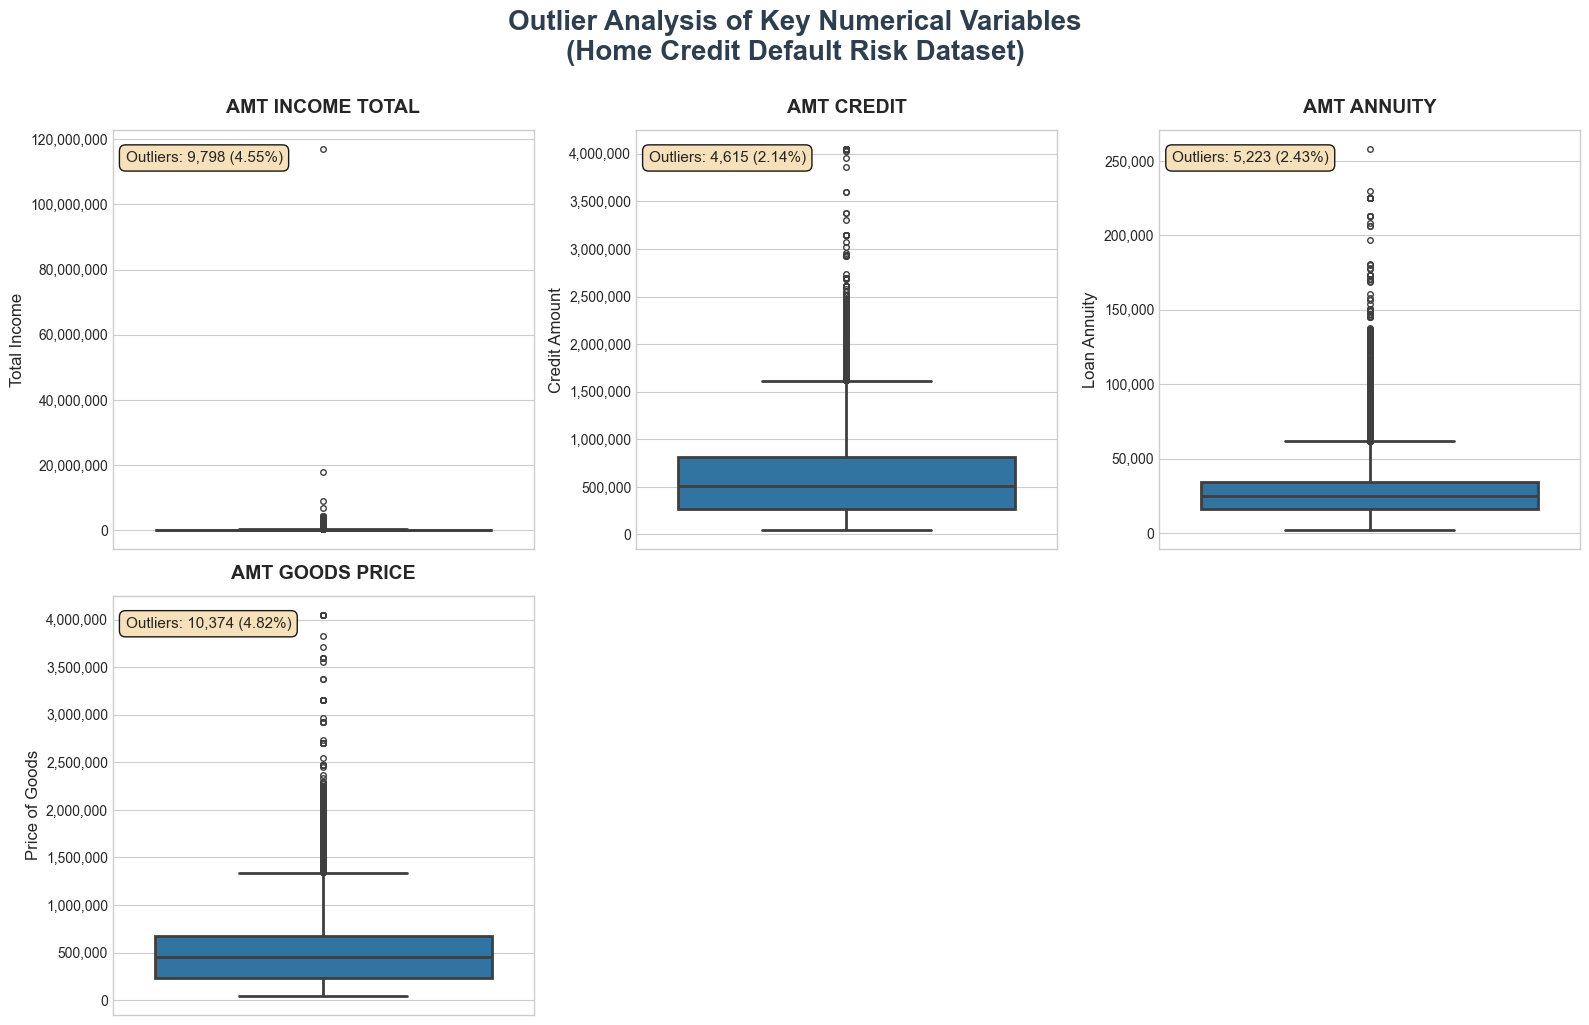

In [ ]:
# OUTLIER sau khi xử lý missing data
# Columns to analyse
numerical_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE' 
]
#hour_appr_process_start(discrete variance) removed because it has no outlier

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_prep[col], color="#1f77b4", linewidth=2, fliersize=4)
    
    # IQR outlier calculation
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df_prep[col] < lower) | (df_prep[col] > upper)).sum()
    outlier_pct = 100 * outliers_count / len(df_prep[col])
    
    ax = plt.gca()
    
    # Proper formatting for each variable (original units)
    if col == 'AMT_INCOME_TOTAL':
        ax.set_ylabel('Total Income', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_CREDIT':
        ax.set_ylabel('Credit Amount', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_ANNUITY':
        ax.set_ylabel('Loan Annuity', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_GOODS_PRICE':
        ax.set_ylabel('Price of Goods', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'HOUR_APPR_PROCESS_START':
        ax.set_ylabel('Hour of Application', fontsize=12)
        ax.set_yticks(np.arange(0, 25, 4))
        ax.set_ylim(-0.5, 23.5)
    
    # Title + outlier info
    plt.title(col.replace('_', ' '), fontsize=14, fontweight='bold', pad=12)
    plt.text(0.03, 0.95,
             f'Outliers: {outliers_count:,} ({outlier_pct:.2f}%)',
             transform=ax.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="wheat", alpha=0.9))

# Main title
plt.suptitle('Outlier Analysis of Key Numerical Variables\n'
             '(Home Credit Default Risk Dataset)',
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

**Nhận xét:**
* `AMT_INCOME_TOTAL`: có một số khách hàng siêu giàu(doanh nhân lớn)-> Outlier nằm rất xa-> Giữ lại các vị khách này vì thường là khách VIP, thường có tỉ lệ vỡ nợ thấp hơn
* `AMT_CREDIT`: khoản vay cực lớn, thường là mua nhà, xe sang hoặc doanh nghiệp nhỏ vay vốn
* `AMT_GOODS_PRICE`: tương tự AMT_CREADIT, nhưng outlier có nhiều hơn một chút do có vài trường hợp giá hàng hóa bị ghi nhầm hoặc thực sự đắt đỏ
* `HOUR_APPR_PROCESS_START`: giờ nộp hồ sơ bất thường(0h-4h sáng)-> Đây là hành vi đáng nghi liên quan đến hành vi gian lận

Không sử dụng được IQR vì nó xóa hoặc cắt nhầm dữ liệu-> không phản ảnh được thực tế dữ liệu

In [ ]:
import numpy as np
# 1. Dùng threshold 
caps = {
    'AMT_INCOME_TOTAL' : np.percentile(df_prep['AMT_INCOME_TOTAL'], 99.5),   
    'AMT_CREDIT'       : np.percentile(df_prep['AMT_CREDIT'], 99.5),        
    'AMT_ANNUITY'      : np.percentile(df_prep['AMT_ANNUITY'], 99.5),       
    'AMT_GOODS_PRICE'  : np.percentile(df_prep['AMT_GOODS_PRICE'], 99.5),   
}

# 2. Winsorize (cắt ngọn)(mọi giá trị lớn hơn threshold bị ép xuống bằng threshols) + tạo flag outlier (rất quan trọng!)
for col, threshold in caps.items():
    df_prep[f'{col}_outlier'] = (df_prep[col] > threshold).astype(int)   # flag: giữ lại thông tin nguwofi này là từng là cực giàu/ vay cực lớn
    df_prep[col] = df_prep[col].clip(upper=threshold)                    # clip: loại bỏ những giá trị cực đoan

#### TÍNH CORRELATION MATRIX

Text(0.5, 1.0, 'Correlation Matrix')

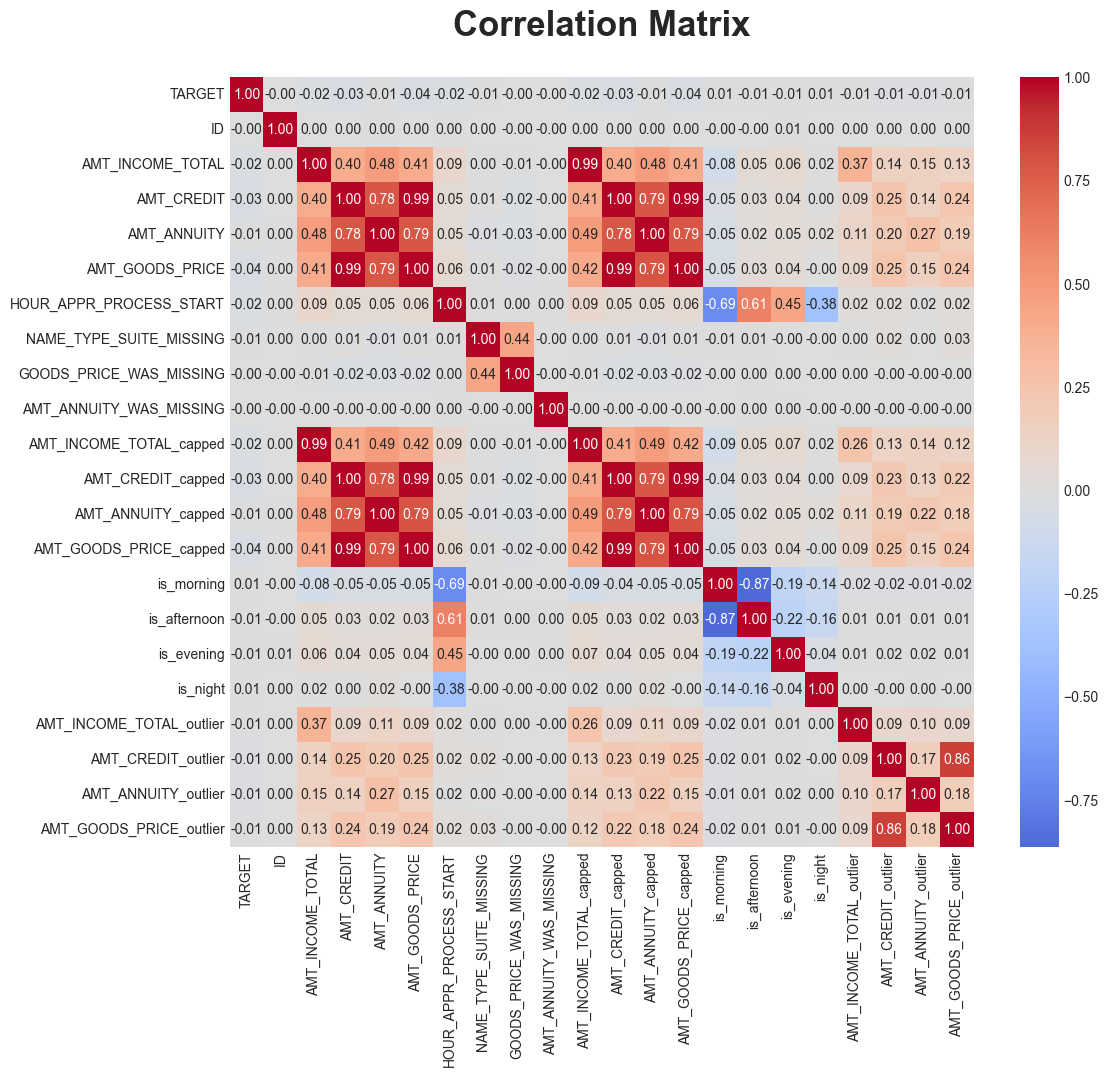

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_prep.select_dtypes(include=['float64', 'int64']).corr(),
             annot=True,
             fmt=".2f",
             center= 0,
             cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25
          ,fontweight='bold',pad=30)
